# **Final Project** | **Loan Approval**

In [1]:
# manejo bbdd
import pandas as pd
import numpy as np

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats 
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

#modelos y evaluación
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestClassifier


#Save and Load Models
import joblib

#warnings
import warnings
warnings.filterwarnings("ignore")

import os

## EDA 

In [2]:
data=pd.read_csv('Data/loan_approval_dataset.csv')

In [3]:
numericas=data.select_dtypes(exclude='object')

In [4]:
data.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
data.shape

(4269, 13)

In [7]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
numericals=data.select_dtypes(include=[np.number])
categoricals=data.select_dtypes(include='object')

### Data Cleaning

#### Nulls

In [9]:
data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
sum(data.isna().sum())

0

There are no nulls in the dataframe

#### Duplicates

In [11]:
data.duplicated().sum()

0

No duplicates

#### Negatives

In [12]:
numericals=data.select_dtypes(include=[np.number])
negatives=(numericals<0).sum()
negatives

loan_id                       0
 no_of_dependents             0
 income_annum                 0
 loan_amount                  0
 loan_term                    0
 cibil_score                  0
 residential_assets_value    28
 commercial_assets_value      0
 luxury_assets_value          0
 bank_asset_value             0
dtype: int64

There are some negative values in the residential_assets_value column that make no sense. They should be removed. We will check the distribution and
see how we should fill them

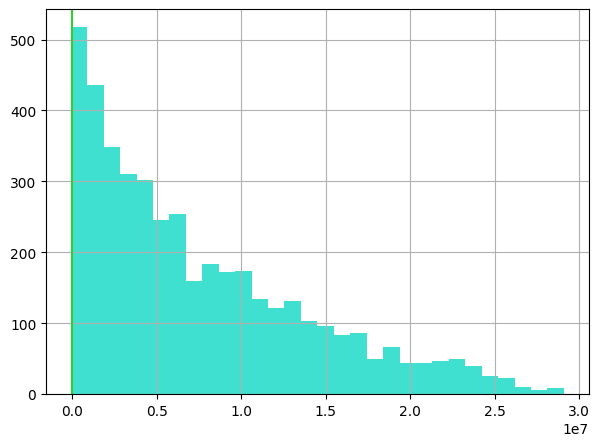

In [13]:
data[' residential_assets_value'].hist(figsize=(7,5),bins=30, color='turquoise')
plt.savefig('Images/residential_negatives.png')
plt.axvline(x=0, color='limegreen')
plt.show()

Given this distribution, using the median for imputation is a reasonable choice. The median is robust to outliers and skewed distributions, 
making it suitable for replacing negative or in this context.We will first fill them with NaNs and then impute them with the median.
This approach makes it clear that the negative values are being treated as missing data

In [14]:
data[' residential_assets_value'] = data[' residential_assets_value'].mask(data[' residential_assets_value'] < 0, np.nan)

In [15]:
median_ = data[' residential_assets_value'][data[' residential_assets_value'] >= 0].median()
data[' residential_assets_value'] = data[' residential_assets_value'].apply(lambda x: x if x >= 0 else median_)

There are no nulls nor duplicates in the dataset. So it looks quite clean for now. However we had to remove some negatives than can make problems in
the future (for example applying a sqrt transformation having negative values)

It looks like the columns are not following PEP 8

In [16]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

I created a function in functions.py that removes spaces of each title column

In [17]:
from functions import remove_spaces
remove_spaces(data)
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

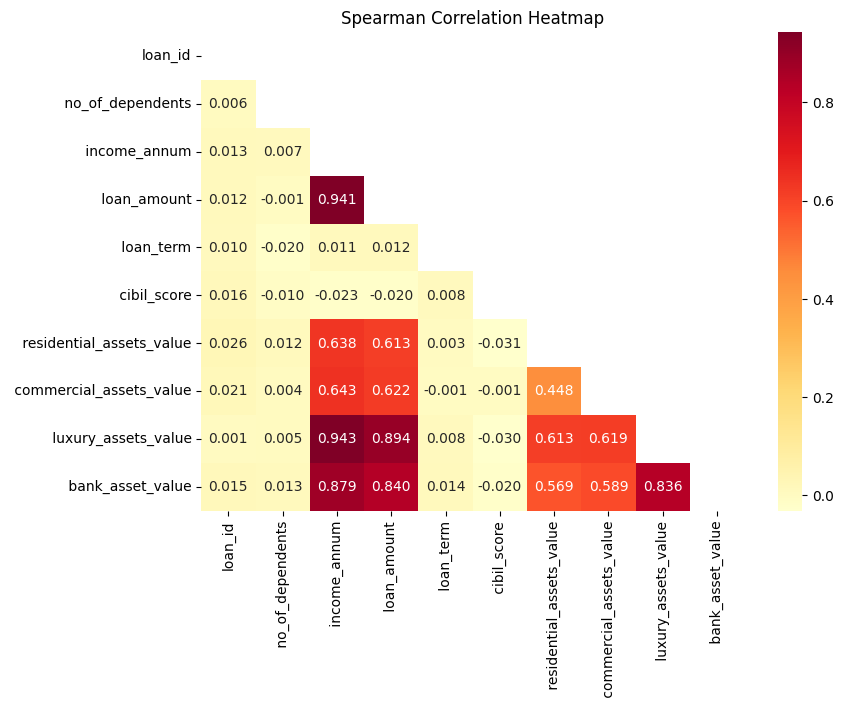

In [18]:
correlation_matrix=numericals.corr(method="spearman")
mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd", fmt=".3f", mask=mask)
plt.tight_layout() 
plt.title("Spearman Correlation Heatmap")

plt.show()

## Preprocessing

### **Numerical Variables**

I will eliminate loan_id because it is not necessary for the analysis

In [19]:
data.drop(columns=['loan_id'], inplace=True)

In [20]:
numericals=data.select_dtypes(include=[np.number])
numericals.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

Our target variable for models like Linear Regression will be 'loan_amount', so we will not consider it in the VIF due to the fact that
in the VIF we want to see correlations between independent variables

### VIF

In [21]:
z=numericals.drop(columns=['loan_amount'])
X = data[z.columns].dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                    feature        VIF
0          no_of_dependents   2.841981
1              income_annum  48.365467
2                 loan_term   3.911571
3               cibil_score   5.879783
4  residential_assets_value   3.933788
5   commercial_assets_value   3.875342
6       luxury_assets_value  27.538982
7          bank_asset_value  12.155868


I will eliminate variables that have VIFs higher than 10, but I want to keep the anual income variable because it is quite important in reality.
It doesn't make sense to drop it. So i will start dropping the luxuty assets variable, and then one by one until there are no more variables with 
VIFs higher than 10

In [22]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [23]:
numericals.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [24]:
z=numericals.drop(columns=['loan_amount','luxury_assets_value'])
X = data[z.columns].dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                    feature        VIF
0          no_of_dependents   2.841775
1              income_annum  20.754742
2                 loan_term   3.911267
3               cibil_score   5.877463
4  residential_assets_value   3.933757
5   commercial_assets_value   3.874674
6          bank_asset_value  12.154225


In [25]:
z=numericals.drop(columns=['loan_amount','luxury_assets_value','bank_asset_value'])
X = data[z.columns].dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                    feature       VIF
0          no_of_dependents  2.841692
1              income_annum  9.353553
2                 loan_term  3.910947
3               cibil_score  5.877263
4  residential_assets_value  3.928577
5   commercial_assets_value  3.874308


Drop the features with VIF > 10

In [26]:
numericals.drop(columns=['luxury_assets_value','bank_asset_value'], inplace=True)

In [27]:
numericals.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value'],
      dtype='object')

We will examine how the heatmap looks after removing the columns with multicollinearity. The target variable will be included as it is important to see how it relates to the independent variables

In [28]:
numericals['loan_amount'] = data['loan_amount']
numericals.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value'],
      dtype='object')

In [29]:
numericals.loan_amount

0       29900000
1       12200000
2       29700000
3       30700000
4       24200000
          ...   
4264     2300000
4265    11300000
4266    23900000
4267    12800000
4268    29700000
Name: loan_amount, Length: 4269, dtype: int64

Let's see a Heatmap after dropping those variables with high VIFs

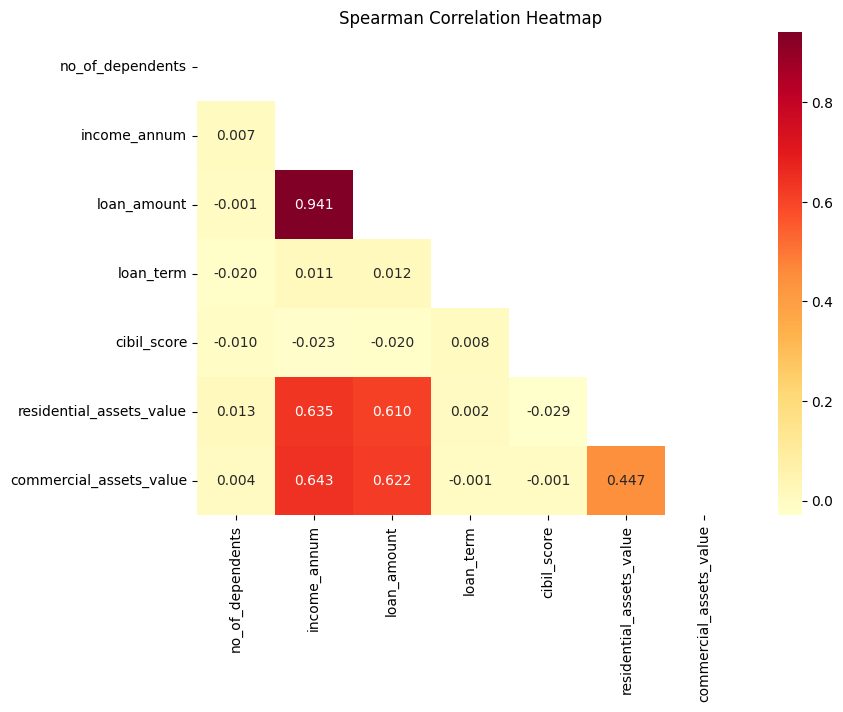

In [30]:
correlation_matrix=numericals.corr(method="spearman")
mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd", fmt=".3f", mask=mask)
plt.tight_layout() 
plt.title("Spearman Correlation Heatmap")

plt.show()

In the Heatmap we can see that correlations are lower than in the previous one. There is only one high value (0.941) but because it is between
the target and one independent variable, it is not a problem

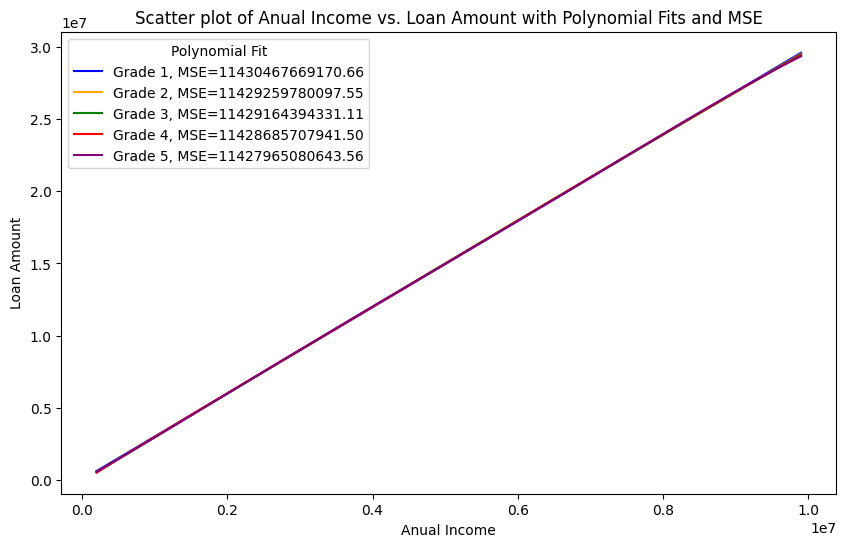

In [31]:
grades = [1, 2, 3, 4, 5]
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(10, 6))

for grade, color in zip(grades, colors):
    coeffs = np.polyfit(data['income_annum'], data['loan_amount'], grade)
    poly = np.poly1d(coeffs)
    
    predictions = poly(data['income_annum'])
    mse = mean_squared_error(data['loan_amount'], predictions)
    
    x_range = np.linspace(data['income_annum'].min(), data['income_annum'].max(), 100)
    plt.plot(x_range, poly(x_range), label=f'Grade {grade}, MSE={mse:.2f}', color=color)

plt.legend(title='Polynomial Fit', loc='upper left')

plt.title('Scatter plot of Anual Income vs. Loan Amount with Polynomial Fits and MSE')
plt.xlabel('Anual Income')
plt.ylabel('Loan Amount')
plt.show()

Eventhough, the lowest MSE grade is 5, the polynomial fit is quite linear

In [32]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

### Numerical Transformations

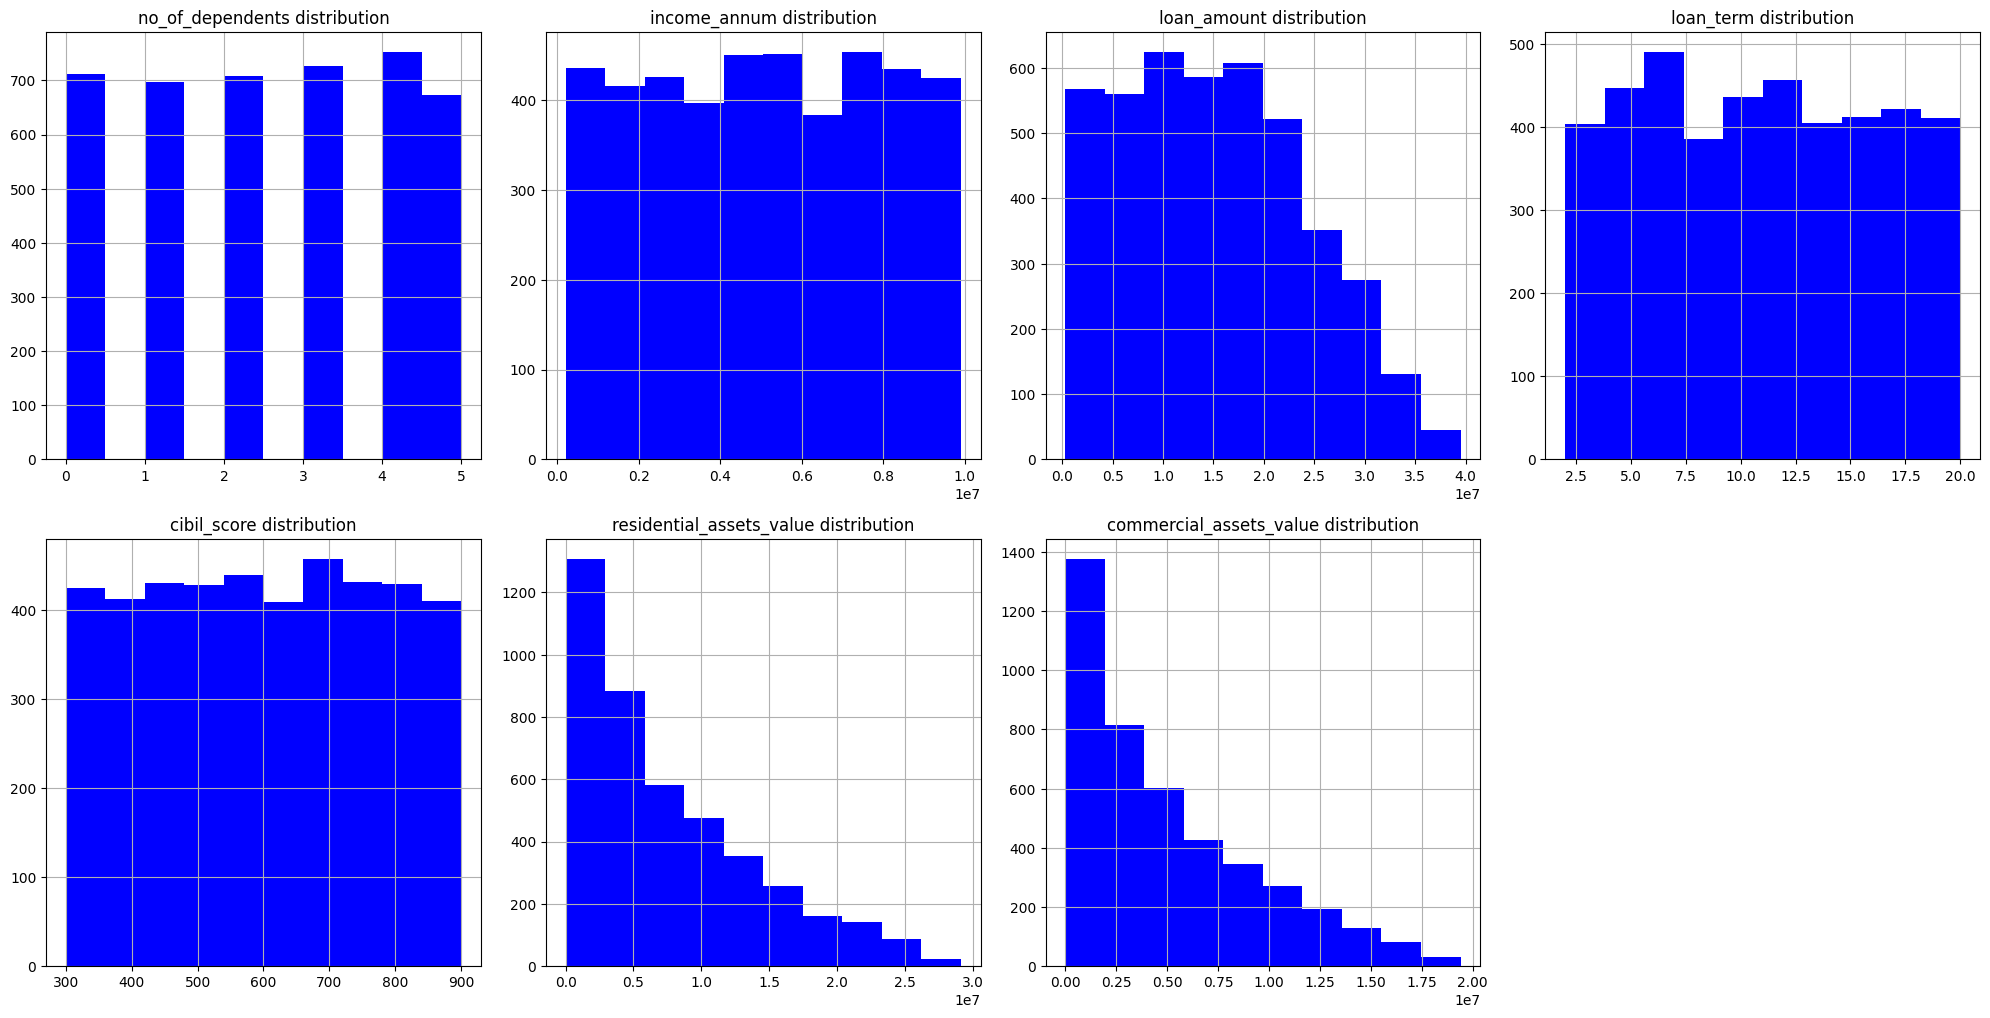

In [33]:
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=10,ax=ax,facecolor='blue')
        ax.set_title(feature+" distribution",color='black')
    fig.tight_layout()
    plt.savefig  ('Images/histogramsssss.png')
    plt.show()
histograms_plot(data, numericals.columns, 4,4)

Let's see the distplots to get a better idea of their tendencies before we start transforming them

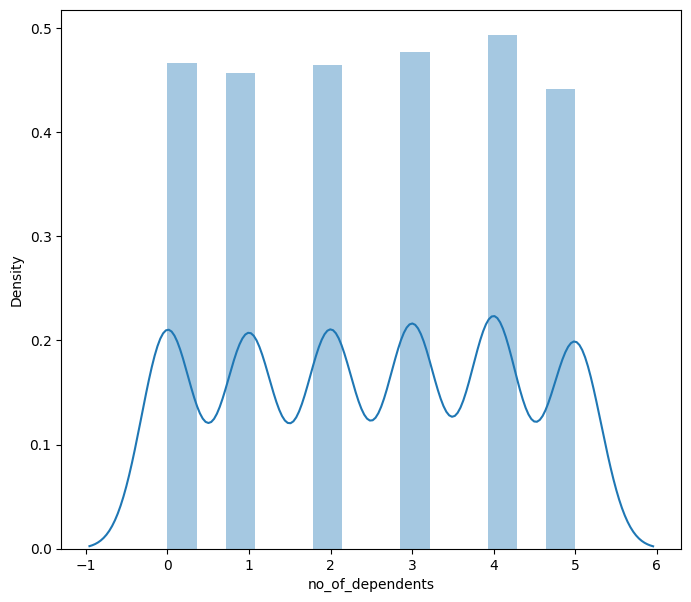

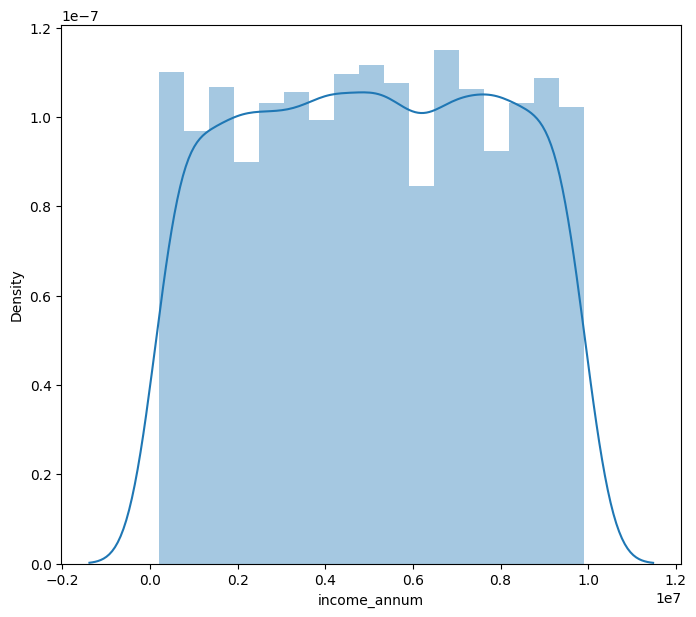

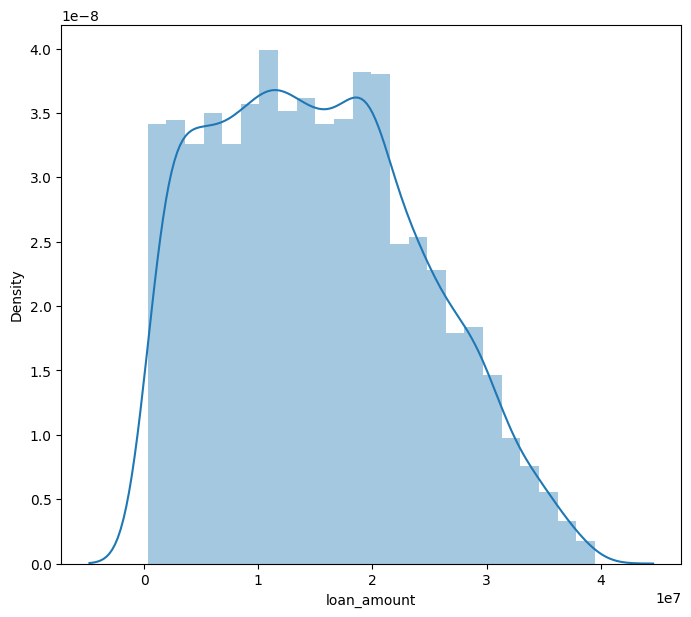

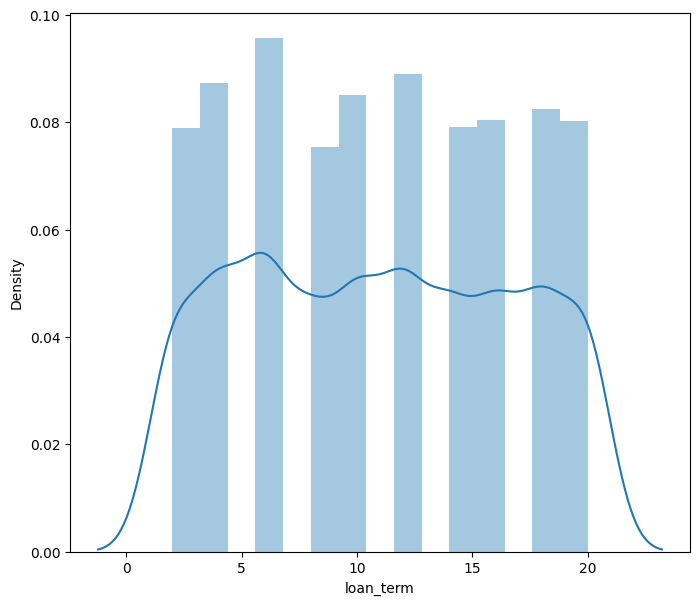

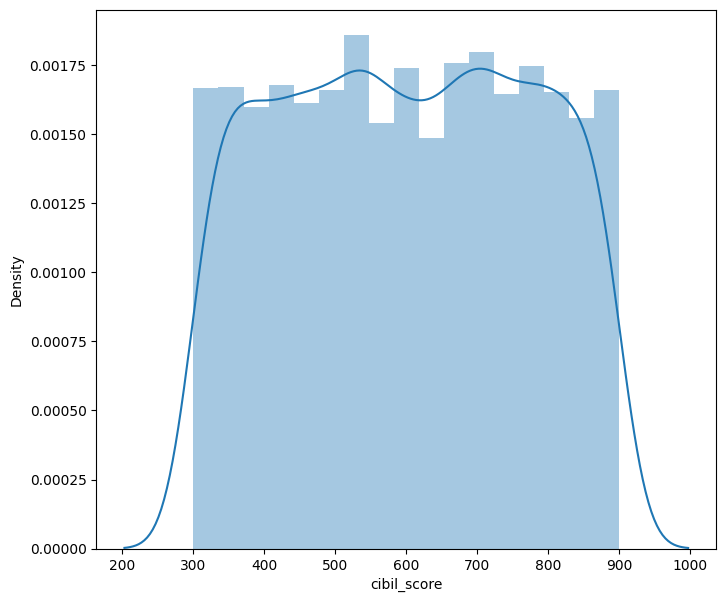

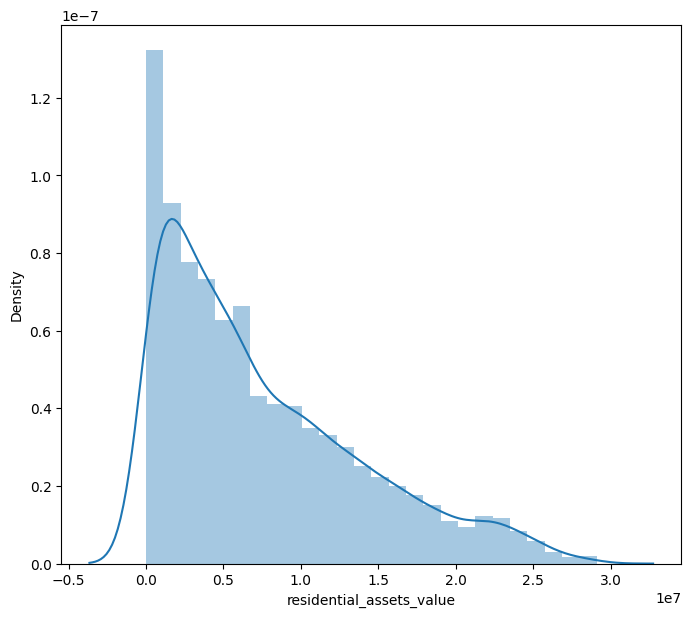

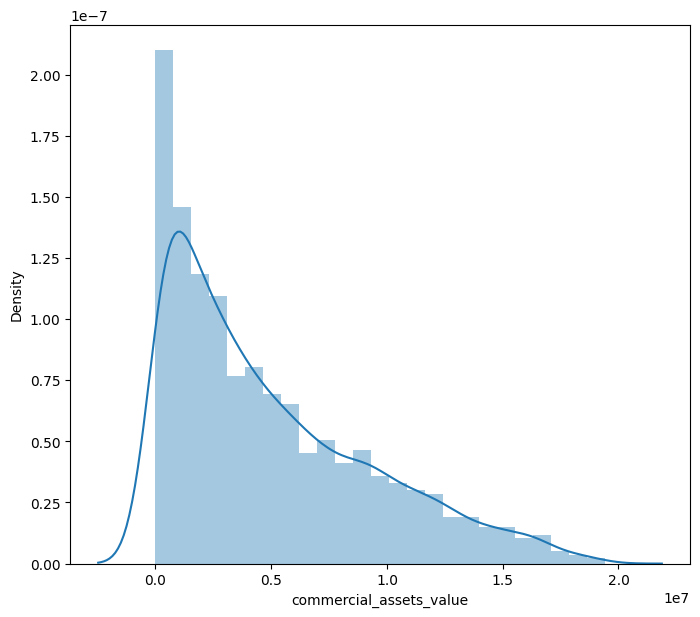

In [34]:
for i in numericals.columns.to_list():
    fig=plt.figure(figsize=(8,7))
    sns.distplot(numericals[i])
    plt.show()

Nos let's look at the boxplots to get a better visualization of their outliers

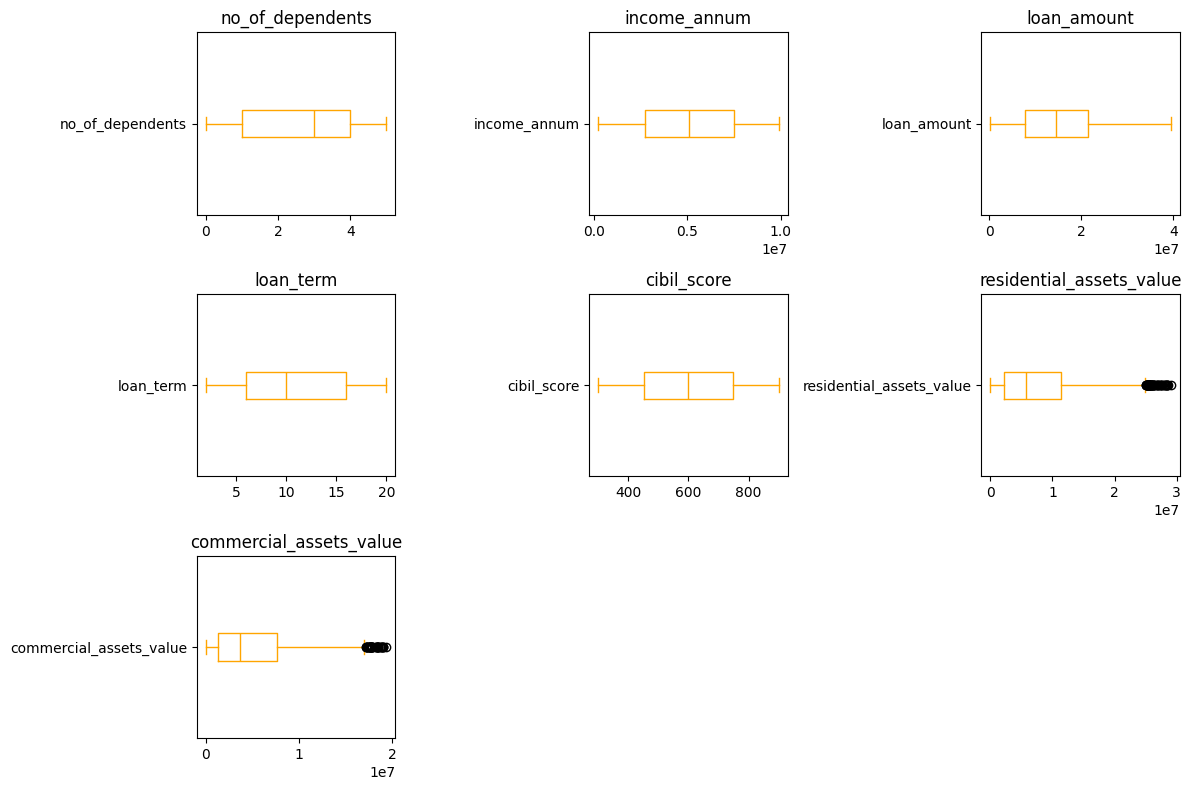

In [35]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numericals, 1):
    plt.subplot(3, 3, i)
    data[col].plot(kind='box', vert=False, color='orange')
    plt.title(col)
plt.tight_layout()
plt.show()

In [36]:
#Logarithm
def log_transfom_clean_(x):   
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN 

In [37]:
#Square Root
def sqrt_transfom_clean_(x): 
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

Looks like 'residential_assets_value' and 'commercial_assets_value' have a lot of outliers. 'bank_asset_value' also have some. The others
don't seem to have, at least by the criteria used in the boxplot

We will use Logarithmic and Square Root Transformation functions (if neccesary) to normalize the data. Looking at the distplots that will
be displayed we can get an idea of the distribution of the data and evaluate if it is normally distributed or not

No let's start transforming/analyzing them one by one

#### Number of dependents

In [38]:
data['no_of_dependents'].value_counts()
#There is no data imbalance

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

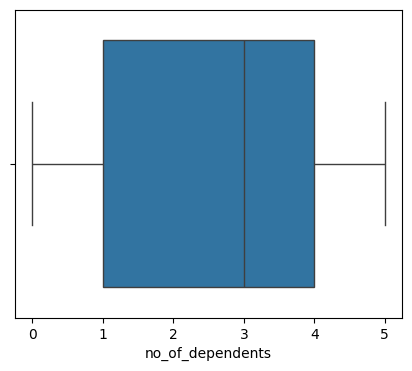

In [39]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=data['no_of_dependents'])
plt.show()
#No outliers for now

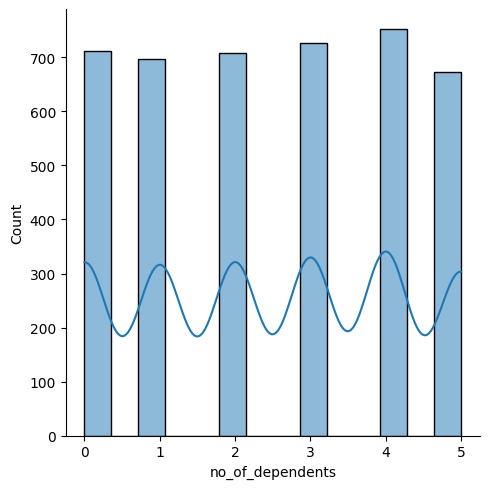

In [40]:
sns.displot(data['no_of_dependents'], kde=True)
plt.show()

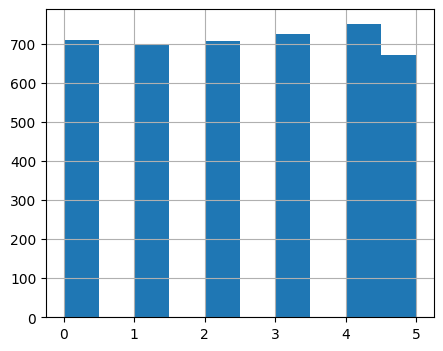

In [41]:
data['no_of_dependents'].hist(figsize=(5,4))
plt.show()

Looking at the previous graphs it looks like no transformations will be needed. Besided, there are no outliers. So, the variable
will stay as it is

### Anual Income

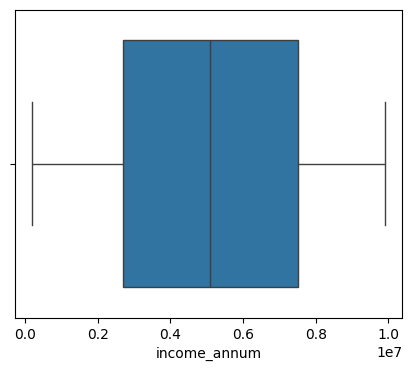

In [42]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=data['income_annum'])
plt.show()
#No outliers for now

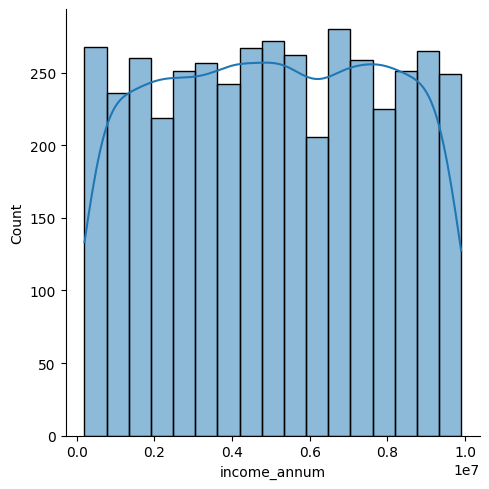

In [43]:
sns.displot(data['income_annum'], kde=True)
plt.show()

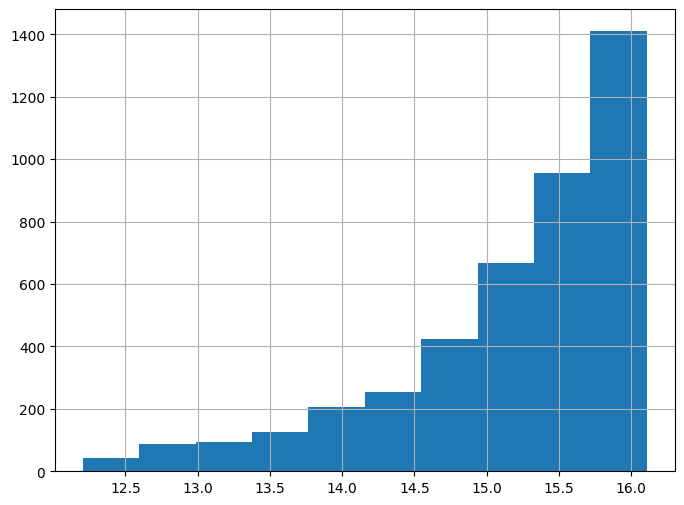

In [44]:
lincome_annum_log=pd.Series(map(log_transfom_clean_, data['income_annum'])).hist(figsize=(8,6))
plt.show() 

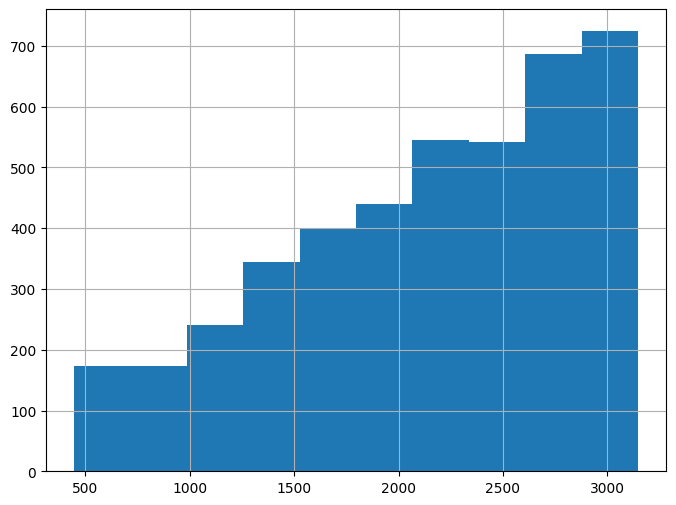

In [45]:
income_annum_sqrt=pd.Series(map(sqrt_transfom_clean_, data['income_annum'])).hist(figsize=(8,6))
plt.show()  

The distribution looks more normal without transformations so we will keep it as it is

Outliers

In [46]:
#Upper limit
iqr = np.percentile(data['income_annum'],75) - np.percentile(data['income_annum'],25)
upper_limit = np.percentile(data['income_annum'],75) +1.5*iqr
print(upper_limit)

14700000.0


In [47]:
len(data[data['income_annum'] > upper_limit])

0

In [48]:
#Lower limit
iqr = np.percentile(data['income_annum'], 75) - np.percentile(data['income_annum'], 25)
lower_limit = np.percentile(data['income_annum'], 25) -1.5 * iqr

print(lower_limit)

-4500000.0


In [49]:
# Count the number of data points below the lower limit
num_below_lower_limit = len(data[data['loan_amount'] < lower_limit])
print(num_below_lower_limit)

0


There are no outliers

### Loan Term

In [50]:
data.loan_term.value_counts()

loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64

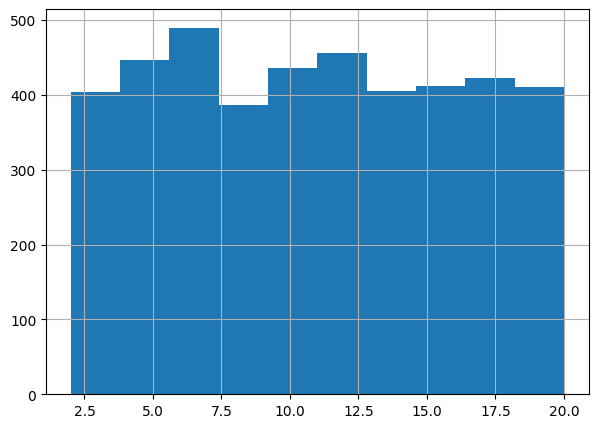

In [51]:
data.loan_term.hist(figsize=(7,5))
plt.show()

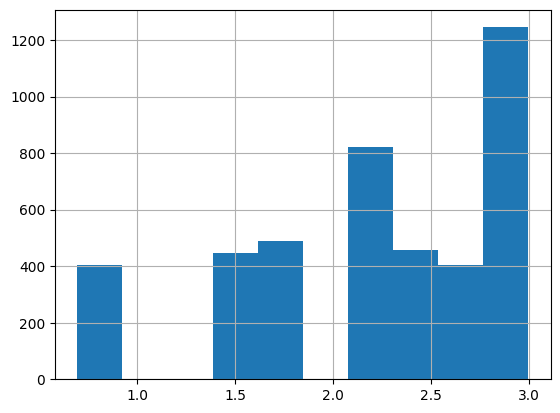

In [52]:
loan_term_log=pd.Series(map(log_transfom_clean_, data['loan_term'])).hist()
plt.show() 

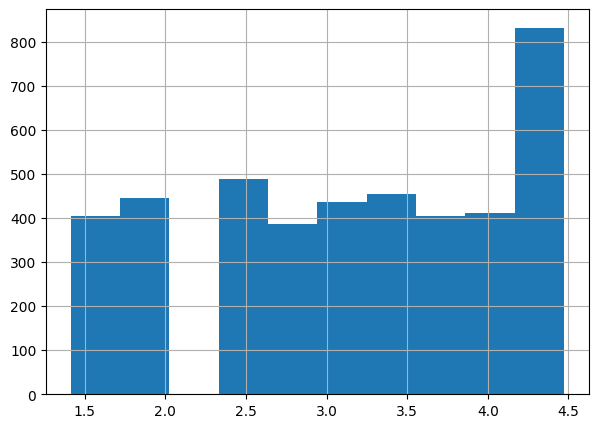

In [53]:
loan_term_sqrt=pd.Series(map(sqrt_transfom_clean_, data['loan_term'])).hist(figsize=(7,5))
plt.show()  

We will keep it without transformations

### Cibil Score

In [54]:
data.cibil_score.value_counts()

cibil_score
348    16
543    15
538    15
778    14
509    14
       ..
334     2
773     2
893     2
484     2
864     1
Name: count, Length: 601, dtype: int64

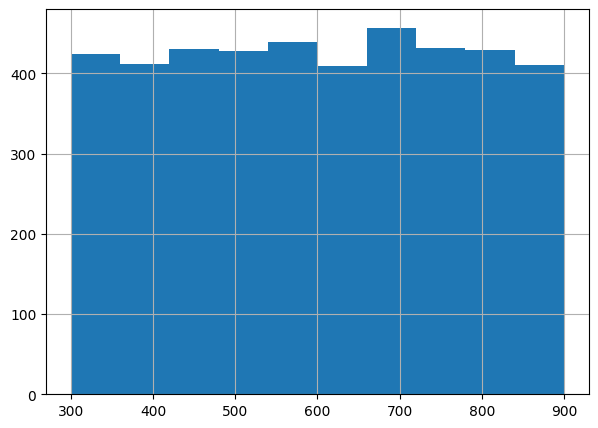

In [55]:
data.cibil_score.hist(figsize=(7,5))
plt.show()

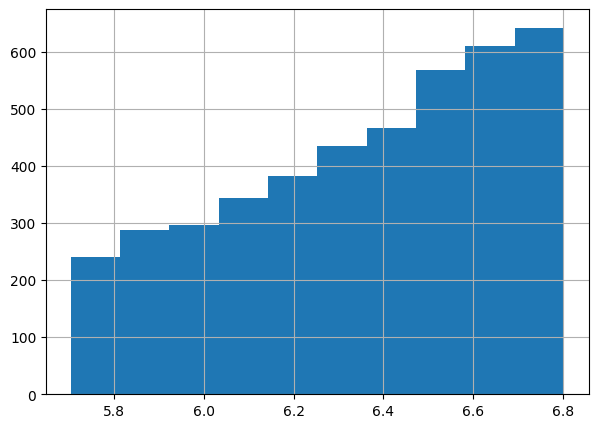

In [56]:
cibil_score_log=pd.Series(map(log_transfom_clean_, data['cibil_score'])).hist(figsize=(7,5))
plt.show() 

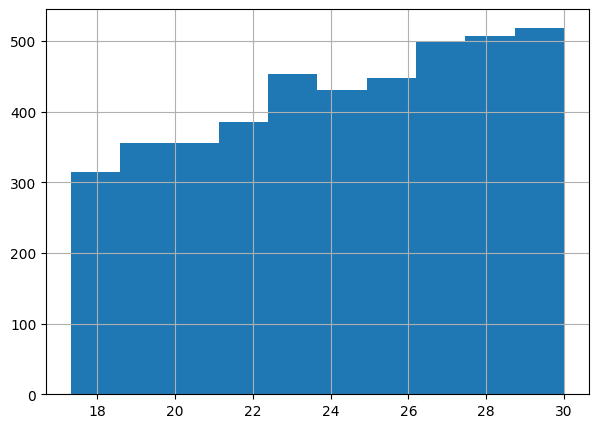

In [57]:
cibil_score_sqrt=pd.Series(map(sqrt_transfom_clean_, data['cibil_score'])).hist(figsize=(7,5))
plt.show() 

Stays better without transformation. Since there were not outliers before, there are no outliers now because we didn't transform.

#### Residential Assets Value

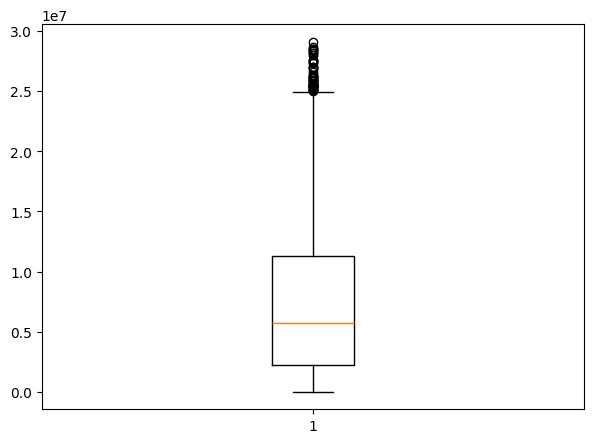

In [58]:
plt.figure(figsize=(7,5))
plt.boxplot(data['residential_assets_value'])
plt.show()

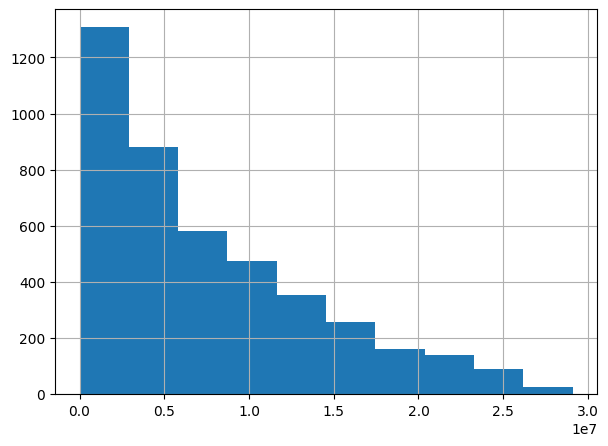

In [59]:
data.residential_assets_value.hist(figsize=(7,5))
plt.show()

Looking at the distribution, looks that a logarithmic transformation could fit

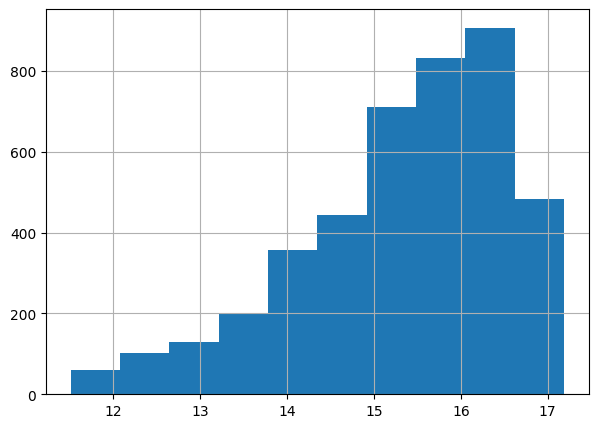

In [60]:
ressidential_assets_value_log=pd.Series(map(log_transfom_clean_, data['residential_assets_value'])).hist(figsize=(7,5))
plt.show() 

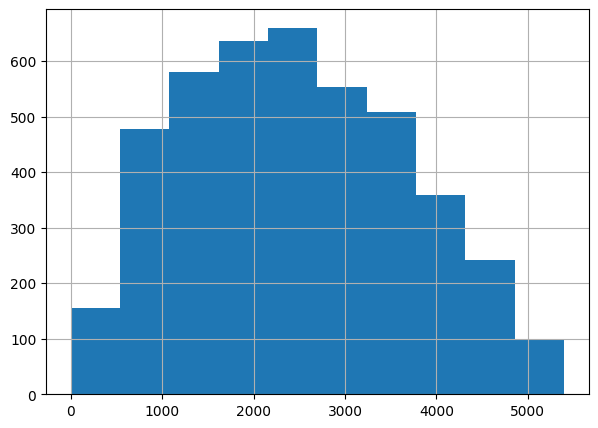

In [61]:
ressidential_assets_value_sqrt=pd.Series(map(sqrt_transfom_clean_, data['residential_assets_value'])).hist(figsize=(7,5))
plt.show() 

In [62]:
data.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

The square root transformation was the better one, so we will apply this one

In [63]:
data['residential_assets_value']=list(map(sqrt_transfom_clean_, data['residential_assets_value']))

Outliers

In [64]:
#Upper limit
iqr = np.percentile(data['residential_assets_value'],75) - np.percentile(data['residential_assets_value'],25)
upper_limit = np.percentile(data['residential_assets_value'],75) +1.5*iqr
print(upper_limit)

6179.008610857107


In [65]:
#Upper limit
iqr = np.percentile(data['residential_assets_value'],75) - np.percentile(data['residential_assets_value'],25)
upper_limit = np.percentile(data['residential_assets_value'],75) +1.5*iqr
print(upper_limit)

6179.008610857107


In [66]:
len(data[data['residential_assets_value'] > upper_limit])

0

In [67]:
#Lower limit
iqr = np.percentile(data['residential_assets_value'], 75) - np.percentile(data['residential_assets_value'], 25)
lower_limit = np.percentile(data['residential_assets_value'], 25) -1.5 * iqr

print(lower_limit)

-1334.2216506436519


In [68]:
len(data[data['residential_assets_value'] < lower_limit])

0

There are no outliers. But it is important to notice that before there were a lot. But due to the transformation, they dissapeared

### Commercial Asssets Value

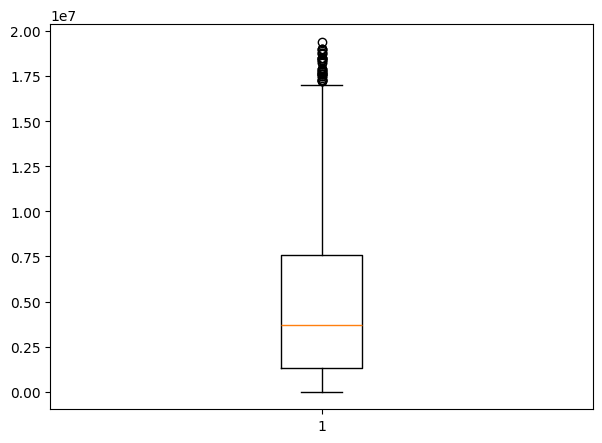

In [69]:
plt.figure(figsize=(7,5))
plt.boxplot(data['commercial_assets_value'])

plt.show()
#There are outliers, but we will look at them later

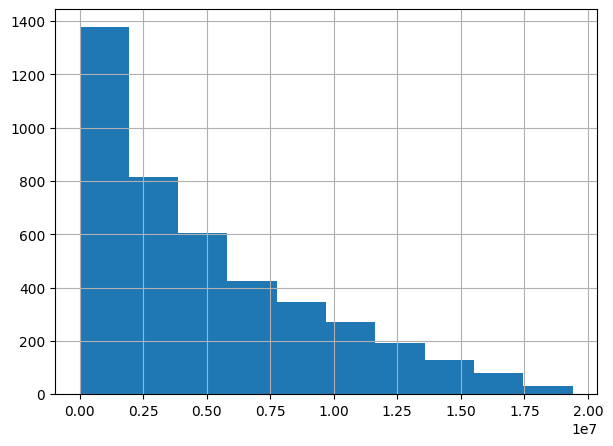

In [70]:
data.commercial_assets_value.hist(figsize=(7,5))
plt.show()

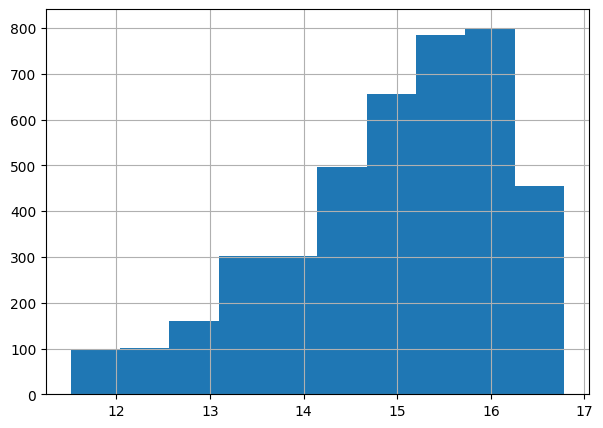

In [71]:
commercial_assets_value_log=pd.Series(map(log_transfom_clean_, data['commercial_assets_value'])).hist(figsize=(7,5))
plt.show() 

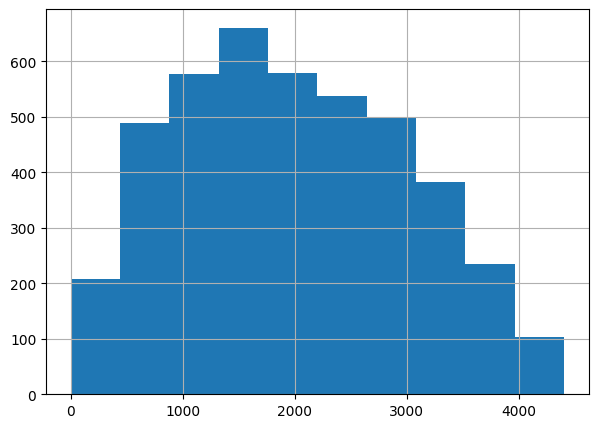

In [72]:
commercial_assets_value_sqrt=pd.Series(map(sqrt_transfom_clean_, data['commercial_assets_value'])).hist(figsize=(7,5))
plt.show() 

The square root transformation looks great. Let's apply it


In [73]:
data['commercial_assets_value']=list(map(sqrt_transfom_clean_, data['commercial_assets_value']))

Outliers

In [74]:
#Upper limit
iqr = np.percentile(data['commercial_assets_value'],75) - np.percentile(data['commercial_assets_value'],25)
upper_limit = np.percentile(data['commercial_assets_value'],75) +1.5*iqr
print(upper_limit)

5181.761238396403


In [75]:
len(data[data['commercial_assets_value'] > upper_limit])

0

In [76]:
#Lower limit
iqr = np.percentile(data['commercial_assets_value'], 75) - np.percentile(data['commercial_assets_value'], 25)
lower_limit = np.percentile(data['commercial_assets_value'], 25) -1.5 * iqr

print(lower_limit)

-1284.7760628792212


In [77]:
len(data[data['commercial_assets_value'] < lower_limit])

0

No outliers to remove

================================================================================

No that the transformations are finished, let's check how the histograms look like

In [78]:
numericals.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value'],
      dtype='object')

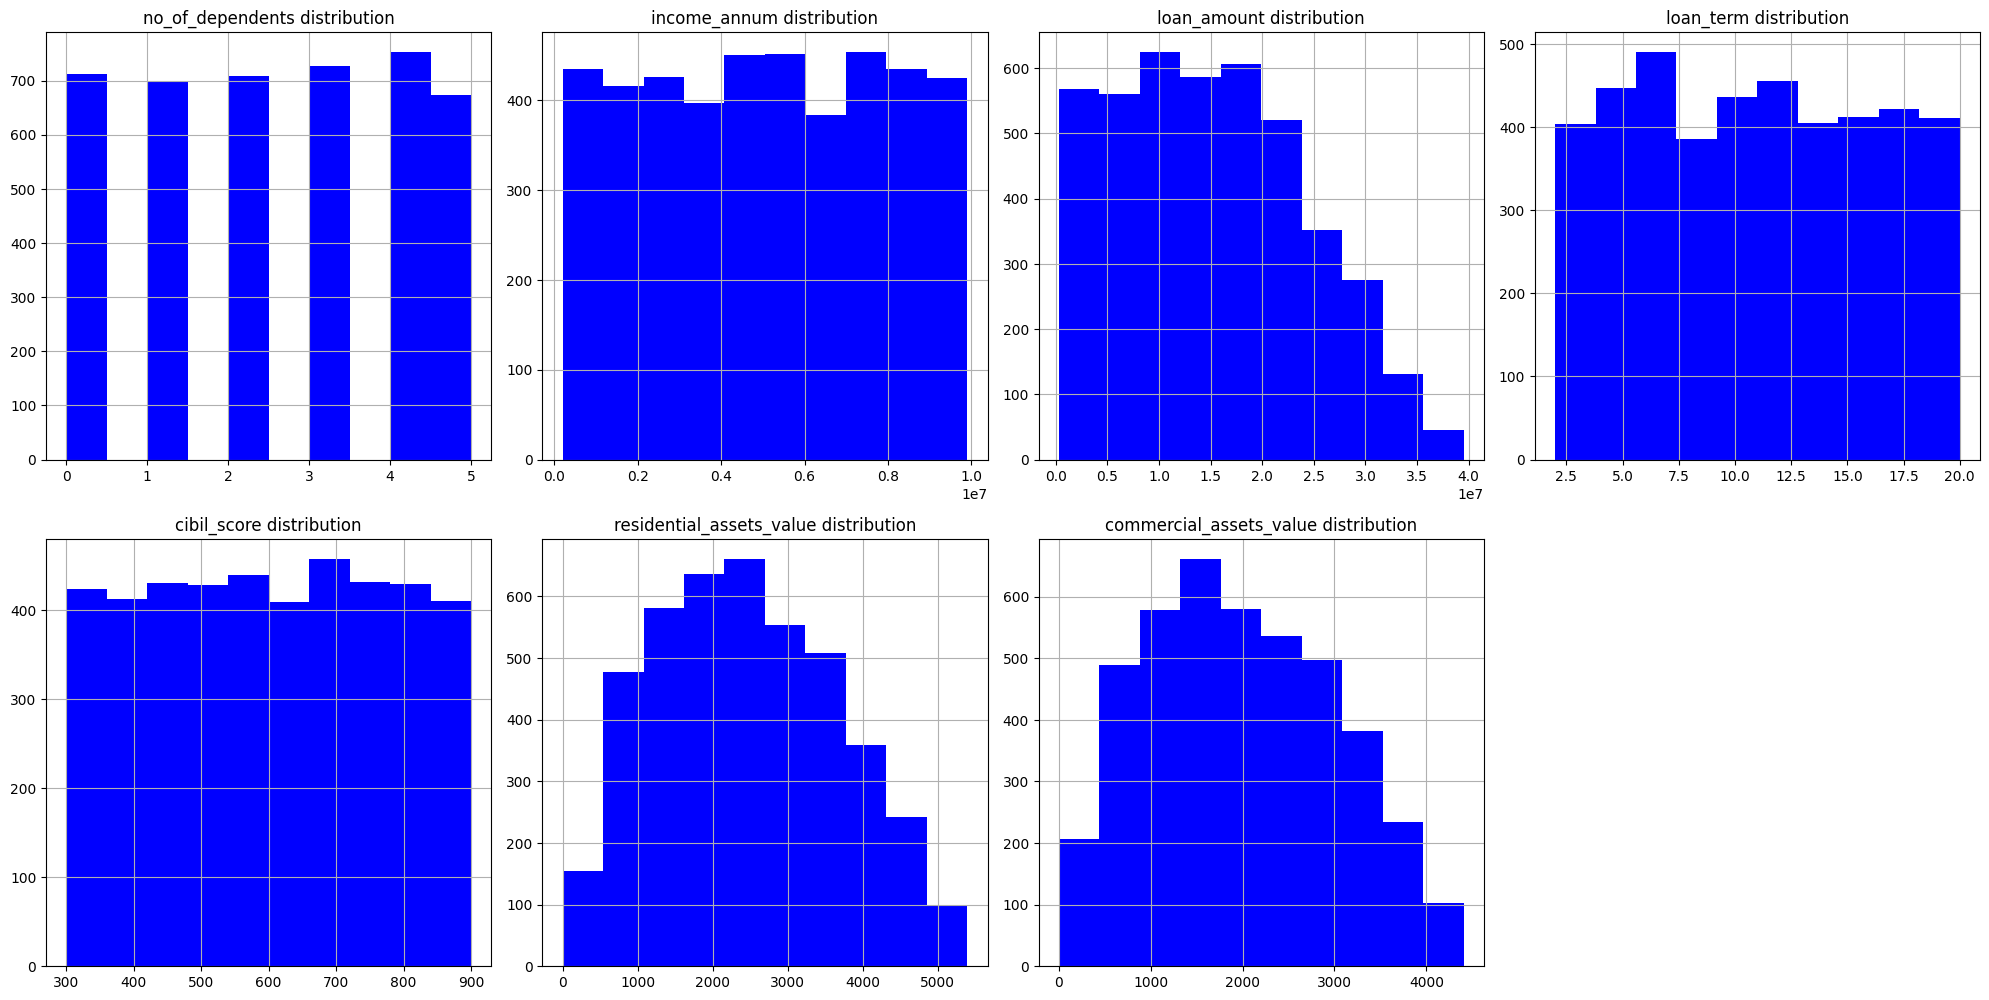

In [79]:
histograms_plot(data, numericals.columns, 4,4)

The distributions look much more normal in general. This is a good improvement that will help with the machine learning models

Now let's analyze categorical features

In [80]:
X_cat=data.select_dtypes(include='object')
X_cat.sample()

,education,self_employed,loan_status
91,Graduate,No,Rejected


For the moment none of the variables looks irrelevant so i will keep them as they are

## Chi2 Tests

In [81]:
X_cat.education.value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [82]:
X_cat.loan_status.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [83]:
X_cat.self_employed.value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

There is no imbalance data to treat (maybe in loan_status there is some inbalance but it is an important feature so it is better to
not touch it)

In [84]:
data_crosstab = pd.crosstab(data['education'], data['self_employed'], margins=False)
data_crosstab

self_employed,No,Yes
education,,
Graduate,1089,1055
Not Graduate,1030,1095


In [85]:
chi2, p, dof, expected = chi2_contingency(data_crosstab, correction=False)

print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 2.3024245418855758
P-value: 0.1291722274463409
Degrees of freedom: 1
Expected frequencies:
[[1064.21550714 1079.78449286]
 [1054.78449286 1070.21550714]]


In [86]:
alpha = 0.05 
if p < alpha:
    print("\nWe reject the null hypothesis")
else:
    print("\nWe don't reject the null hypothesis")


We don't reject the null hypothesis


In [87]:
data_crosstab = pd.crosstab(data['education'], data['loan_status'], margins=False)
data_crosstab

loan_status,Approved,Rejected
education,,
Graduate,1339,805
Not Graduate,1317,808


In [88]:
chi2, p, dof, expected = chi2_contingency(data_crosstab, correction=False)

print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 0.10324749653779206
P-value: 0.7479667765342534
Degrees of freedom: 1
Expected frequencies:
[[1333.91051769  810.08948231]
 [1322.08948231  802.91051769]]


In [89]:
alpha = 0.05 
if p < alpha:
    print("\nWe reject the null hypothesis")
else:
    print("\nWe don't reject the null hypothesis")


We don't reject the null hypothesis


In [90]:
data_crosstab = pd.crosstab(data['self_employed'], data['loan_status'], margins=False)
data_crosstab

loan_status,Approved,Rejected
self_employed,,
No,1318,801
Yes,1338,812


In [91]:
chi2, p, dof, expected = chi2_contingency(data_crosstab, correction=False)

print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 0.0005066681503314847
P-value: 0.9820417012815553
Degrees of freedom: 1
Expected frequencies:
[[1318.35652378  800.64347622]
 [1337.64347622  812.35652378]]


In [92]:
alpha = 0.05 
if p < alpha:
    print("\nWe reject the null hypothesis")
else:
    print("\nWe don't reject the null hypothesis")


We don't reject the null hypothesis


So, we don't have to dropp variables. There is no significant relationship between each pair of variables

## MODELS

### 1) Linear Regression 

For this model, and a few more after this one, our target variable will be 'loan_amount'

In [93]:
data.sample()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3542,1,Graduate,No,6500000,23400000,2,672,2236.067977,3224.903099,16700000,7600000,Approved


We will define a new dataframe in order to apply the linear regression only to the approved loans data

In [94]:
data.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [95]:
approved_data=data[data['loan_status']==' Approved']

In [96]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [97]:
data['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [98]:
approved_data.shape

(2656, 12)

Firstly we will reset index of thie new dataframe and then drop the column loan_status from the new dataframe

In [99]:
approved_data.reset_index(drop=True, inplace=True)

In [100]:
approved_data.drop(columns=['loan_status'], inplace=True)
approved_data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [101]:
approved_data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [102]:
Y=approved_data['loan_amount']
X_num=approved_data.select_dtypes(include=[np.number])
X_num.drop(columns=['loan_amount','luxury_assets_value','bank_asset_value'], inplace=True) #Apart from loan amount, I remove the 2 I dropped due 
#to high VIF

In [103]:
approved_data.loan_amount.value_counts()

loan_amount
20000000    17
20900000    16
23900000    16
1800000     16
8100000     16
            ..
35700000     1
38800000     1
35400000     1
35900000     1
33300000     1
Name: count, Length: 374, dtype: int64

In [104]:
X_num.columns

Index(['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value'],
      dtype='object')

In [105]:
X_cat=approved_data[['education', 'self_employed']]
X_cat

,education,self_employed
0,Graduate,No
1,Graduate,No
2,Graduate,Yes
3,Graduate,Yes
4,Graduate,Yes
...,...,...
2651,Graduate,Yes
2652,Graduate,No
2653,Not Graduate,Yes
2654,Not Graduate,No


Encoding Categorical Variables

In [106]:
Le = LabelEncoder()
X_cat['education'] = Le.fit_transform(X_cat['education'].astype(str))
X_cat['self_employed'] = Le.fit_transform(X_cat['self_employed'].astype(str))

encoded=X_cat[['education', 'self_employed']]
encoded

,education,self_employed
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
2651,0,1
2652,0,0
2653,1,1
2654,1,0


Feature Scaling Method: **Standarizing**

We tried normalizing and we got pretty bad results (R2~0.38, with a lot of features that were not significant at all) that couldn't be improved so much, so we will just put the standarization in this project
to make it more efficient

In [107]:
scaler = StandardScaler().fit(X_num)
x_standardized = scaler.transform(X_num)

In [108]:
x_scaled_df = pd.DataFrame(x_standardized, columns=X_num.columns)
x_scaled_df

,no_of_dependents,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value
0,-0.280111,1.618178,0.272592,0.595231,-0.726951,2.141409
1,1.489852,1.299785,-1.088319,-0.203329,1.887005,1.804304
2,-1.460086,-1.494998,1.633503,0.627173,-1.061666,-1.054598
3,0.899865,-0.752081,-1.428546,-1.249442,0.334317,0.178488
4,-0.280111,1.441293,0.612820,-0.195343,0.694620,2.024322
...,...,...,...,...,...,...
2651,0.309877,-0.716704,-0.748091,1.417747,-1.026444,0.133341
2652,0.309877,-0.009164,0.612820,1.289978,-0.220600,0.835060
2653,-1.460086,-0.610573,1.633503,-1.153615,-0.317620,-0.271757
2654,-0.870099,-0.327557,-0.407863,0.611202,0.348650,-1.110531


In [109]:
X_num = X_num.reset_index(drop=True)
X_cat = X_cat.reset_index(drop=True)

In [110]:
X=pd.concat([x_scaled_df, encoded], axis=1)

In [111]:
X.head()

,no_of_dependents,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,education,self_employed
0,-0.280111,1.618178,0.272592,0.595231,-0.726951,2.141409,0,0
1,1.489852,1.299785,-1.088319,-0.203329,1.887005,1.804304,0,0
2,-1.460086,-1.494998,1.633503,0.627173,-1.061666,-1.054598,0,1
3,0.899865,-0.752081,-1.428546,-1.249442,0.334317,0.178488,0,1
4,-0.280111,1.441293,0.612820,-0.195343,0.694620,2.024322,0,1


In [112]:
X.sample()

,no_of_dependents,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,education,self_employed
747,-1.460086,-1.636506,-1.088319,0.499404,-1.218371,-1.390295,0,0


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### 1st Linear Regression Model

We will save/load some of the models to decrease computation time, due to the fact that there will be a lot of models in this notebook

In [114]:
X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1786.
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:06:58   Log-Likelihood:                -34898.
No. Observations:                2124   AIC:                         6.981e+04
Df Residuals:                    2115   BIC:                         6.986e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Predictions using sklearn

In [115]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
X_test = sm.add_constant(X_test)

y_pred = model_1.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"The MSE is {mse:.2f}")

The MSE is 10859748631891.55


The MSE looks huge but it is due to the fact that the values of loan_amount are really big

### Feature Importance to the 1st Linear Regression model

In [116]:
feature_names = X_train.columns[1:]
coefficients = model1.params[1:]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

importance_df['Absolute_Coefficient'] = importance_df['Coefficient'].abs()
importance_df_sorted = importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("\nFeature Importances:")
for _, row in importance_df_sorted.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.2f}")


Feature Importances:
income_annum: 8393821.79
cibil_score: -362012.25
loan_term: -197221.95
commercial_assets_value: 191359.95
education: -169221.19
no_of_dependents: -82775.71
residential_assets_value: 52474.67
self_employed: -43955.09


The model has a lot of room for improvement. We will try different methods to improve it, starting by doing a PCA

### 2) PCA

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [118]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [119]:
X_train_pca = sm.add_constant(X_train_pca)
X_test_pca = sm.add_constant(X_test_pca)

model_pca = sm.OLS(y_train, X_train_pca).fit()
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     2962.
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:06:58   Log-Likelihood:                -35657.
No. Observations:                2124   AIC:                         7.132e+04
Df Residuals:                    2121   BIC:                         7.134e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.529e+07   1.03e+05    148.994      0.0

In [120]:
y_pred_pca = model_pca.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred_pca)
print(f'MSE_PCA: {mse:.2f}')

MSE_PCA: 22352383018739.92


The PCA model looks ok, but maybe we can find a better one

### 3) Polinomial Regression

In [121]:
degree = 3  # #We will change this degree to explore different results
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_poly = sm.add_constant(X_train_poly)
X_test_poly = sm.add_constant(X_test_poly)

model_poly = sm.OLS(y_train, X_train_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     100.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:06:58   Log-Likelihood:                -34812.
No. Observations:                2124   AIC:                         6.992e+04
Df Residuals:                    1977   BIC:                         7.075e+04
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.506e+07   3.64e+05     41.416      0.0

Applying the polinomial transformations to the PCA model

In [122]:
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

pca = PCA(n_components=2)  
X_train_pca_poly = pca.fit_transform(X_train_poly)
X_test_pca_poly = pca.transform(X_test_poly)

X_train_pca_poly = sm.add_constant(X_train_pca_poly)
X_test_pca_poly = sm.add_constant(X_test_pca_poly)

model_pca_poly = sm.OLS(y_train, X_train_pca_poly).fit()
print(model_pca_poly.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     609.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.25e-210
Time:                        00:06:59   Log-Likelihood:                -36591.
No. Observations:                2124   AIC:                         7.319e+04
Df Residuals:                    2121   BIC:                         7.321e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.529e+07   1.59e+05     95.995      0.0

Results are best when degree=1, which is the same as the original PCA model

### RFE

In [123]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=2, verbose=False)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2, verbose=False)

In [124]:
dfrfe = pd.DataFrame(data=rfe.ranking_, columns=['Rank'])
dfrfe['Columna'] = X_train.columns
selected_features = dfrfe[dfrfe['Rank'] == 1]['Columna']

In [125]:
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

In [126]:
X_train_rfe = sm.add_constant(X_train_rfe)
X_test_rfe = sm.add_constant(X_test_rfe)
model = sm.OLS(y_train, X_train_rfe).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     7109.
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:06:59   Log-Likelihood:                -34905.
No. Observations:                2124   AIC:                         6.982e+04
Df Residuals:                    2121   BIC:                         6.983e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.523e+07    7.2e+04    211.422   

In [127]:
y_pred = model.predict(X_test_rfe)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 10823496936300.60


This model looks like is the best one so far (taking into consideration R2s, MSE, p-values, etc) so we will use it as the final model

In [128]:
y_pred

831     1.243676e+07
124     2.062490e+07
1580    7.470277e+06
1611    1.498935e+07
700     1.881387e+07
            ...     
2517    3.337595e+06
1659    8.336061e+06
856     1.405584e+07
1151    9.740698e+06
2110    4.836961e+06
Length: 532, dtype: float64

In [129]:
y_test

831     15500000
124     16400000
1580     8600000
1611    10700000
700     17300000
          ...   
2517     2800000
1659    11000000
856     11500000
1151    10600000
2110     5300000
Name: loan_amount, Length: 532, dtype: int64

In [130]:
y_pred - y_test

831    -3.063243e+06
124     4.224898e+06
1580   -1.129723e+06
1611    4.289348e+06
700     1.513867e+06
            ...     
2517    5.375946e+05
1659   -2.663939e+06
856     2.555837e+06
1151   -8.593019e+05
2110   -4.630389e+05
Length: 532, dtype: float64

### Cross Validation to the final model (RFE)

In [131]:
class OLSWrapper(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.model = None
    
    def fit(self, X, y):
        X = sm.add_constant(X)
        self.model = sm.OLS(y, X).fit()
        return self
    
    def predict(self, X):
        X = sm.add_constant(X)
        return self.model.predict(X)

ols_model = OLSWrapper()

kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(ols_model, X_train_rfe, y_train, cv=kf, scoring='r2')

print("Cross-validation R^2 scores:", np.round(cv_scores, 2))
print("Mean R^2 score:", np.mean(cv_scores).round(2))
print("Standard deviation of R^2 scores:", np.std(cv_scores).round(2))

Cross-validation R^2 scores: [0.88 0.86 0.87 0.86 0.87]
Mean R^2 score: 0.87
Standard deviation of R^2 scores: 0.01


The results from both the OLS regression and cross-validation indicate that the RFE model is performing well, explaining around 87% of the variance 
in loan amounts consistently across different data subsets. This suggests that the model is robust and likely to generalize well to new, 
unseen data

As we so in the VIF analysis, income was a variable that was candidate to be dropped (because its VIF was aounrd 50) but we kept it because of it's importance conceptually.
The fact that it's VIF was so high means that the correlation with loan_amount was really high so we will show what a model using only income
as independent variable looks like

### RFE using only income (X='income_annum')

In [132]:
X_train_rfe = X_train_rfe.drop(columns=['cibil_score'])
X_test_rfe = X_test_rfe.drop(columns=['cibil_score'])

X_train_rfe = sm.add_constant(X_train_rfe)
X_test_rfe = sm.add_constant(X_test_rfe)

model_solo_inc = sm.OLS(y_train, X_train_rfe).fit()

print(model_solo_inc.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:06:59   Log-Likelihood:                -34921.
No. Observations:                2124   AIC:                         6.985e+04
Df Residuals:                    2122   BIC:                         6.986e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.523e+07   7.25e+04    209.889   

In [133]:
y_pred = model_solo_inc.predict(X_test_rfe)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 11081978576814.50


Results using only the income_annum as the independent variable are pretty nice. However, having cibil score makes a better model. Slightly better
R2s and lower mse. Now let's eliminate the income variable as the VIF suggested and see what happens

### RFE without income

In [134]:
X_reduced4 = X.drop(columns=['income_annum'])
X_train, X_test, y_train, y_test = train_test_split(X_reduced4, Y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model_sin_inc = sm.OLS(y_train, X_train).fit()

print(model_sin_inc.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     344.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:06:59   Log-Likelihood:                -36266.
No. Observations:                2124   AIC:                         7.255e+04
Df Residuals:                    2116   BIC:                         7.259e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

It is interesting that eventhough results are not great, they are quite decent. This model, if improved, can be useful because in the past
it was not compulsary for clients to state their actual income, so, in cases the client did not give that data, we can still make predictions with
this model

### Feature importance to the best RFE model

In [135]:
coefficients = model.params
feature_names = X_train.columns

importance_list = list(zip(feature_names, coefficients))

importance_list_sorted = sorted(importance_list, key=lambda x: abs(x[1]), reverse=True)

print("Feature Importances:")
for feature, importance in importance_list_sorted:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
const: 15228642.5287
no_of_dependents: 8548554.4572
loan_term: -406874.6802


### **Summary of results** 
After applying the 3 models (LR, PCA, Polynomial F) we used to predict the variable 'loan_amount', we found out that the model
that works best is the **Linear Regression using RFE**, having:

- Independent variables: Income and Cibil Score
- R2=0.87
- All p-values were 0
- Prob(F-Statistic)=0


This model is amazing, so we will use it to make some predictions in the rejected subset that we will create in the following cells

In [136]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [137]:
rejected_data=data[data['loan_status']==' Rejected']
rejected_data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,Not Graduate,Yes,4100000,12200000,8,417,1643.167673,1483.239697,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,2664.582519,2121.320344,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,4266.145802,1816.590212,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,3521.363372,2863.564213,29400000,5000000,Rejected
5,0,Graduate,Yes,4800000,13500000,10,319,2607.680962,2880.972058,13700000,5100000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4258,5,Graduate,Yes,9700000,22600000,16,346,4847.679857,3591.656999,26800000,13000000,Rejected
4259,0,Not Graduate,Yes,4500000,11500000,14,509,3660.601044,1516.575089,15400000,5900000,Rejected
4262,5,Graduate,No,1300000,3000000,20,540,1000.000000,1516.575089,3200000,1900000,Rejected
4264,5,Graduate,Yes,1000000,2300000,12,317,1673.320053,707.106781,3300000,800000,Rejected


In [138]:
rejected_data.reset_index(drop=True, inplace=True)

In [139]:
X_num=rejected_data.select_dtypes(include=[np.number])
X_num.drop(columns=['loan_amount'], inplace=True)

In [140]:
X_num.columns

Index(['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [141]:
rejected_data.reset_index(drop=True, inplace=True)

In [142]:
rejected_data.sample()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
841,5,Graduate,No,6600000,21400000,10,447,3563.705936,3331.66625,20200000,6400000,Rejected


In [143]:
rejected_data.drop(columns=['loan_status'], inplace=True)

In [144]:
X_cat=rejected_data[['education', 'self_employed']]
X_cat

,education,self_employed
0,Not Graduate,Yes
1,Graduate,No
2,Graduate,No
3,Not Graduate,Yes
4,Graduate,Yes
...,...,...
1608,Graduate,Yes
1609,Not Graduate,Yes
1610,Graduate,No
1611,Graduate,Yes


In [145]:
Le = LabelEncoder()
X_cat['education'] = Le.fit_transform(X_cat['education'].astype(str))
X_cat['self_employed'] = Le.fit_transform(X_cat['self_employed'].astype(str))

encoded=X_cat[['education', 'self_employed']]
encoded

,education,self_employed
0,1,1
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
1608,0,1
1609,1,1
1610,0,0
1611,0,1


In [146]:
scaler = StandardScaler().fit(X_num)
x_standardized = scaler.transform(X_num)

In [147]:
x_scaled_df = pd.DataFrame(x_standardized, columns=X_num.columns)
x_scaled_df.sample()

,no_of_dependents,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
634,-0.31725,0.355752,-0.701566,-0.643911,-0.144316,1.279457,-0.111671,-0.281842


In [148]:
x_scaled_df.shape

(1613, 8)

In [149]:
X=pd.concat([x_scaled_df, encoded], axis=1)
X.sample()

,no_of_dependents,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed
908,0.272294,-0.365726,-0.701566,1.512322,0.39941,0.305687,-0.233662,-0.219554,1,1


In [150]:
X.shape

(1613, 10)

In [151]:
X.sample()

,no_of_dependents,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed
1373,0.272294,1.690486,0.051095,0.734037,0.413166,1.896977,1.718195,1.898249,0,1


In [152]:
rejected_data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [153]:
selected_features=['income_annum','commercial_assets_value']
X_rejected = rejected_data[selected_features]
X_rejected = sm.add_constant(X_rejected)
y_pred_rejected = model.predict(X_rejected)

#### Histograms for rejected data showing the difference between the loan and the maximum loan the bank was able to lend

- y_test contains the actual loan amounts requested by the applicants
- y_pred contains the predicted maximum loan amounts the bank would lend, as estimated by your model.
By calculating differences = y_test - y_pred, you get the difference between what the applicants requested and what the bank would lend
at maximum according to your model's predictions. The histogram will then display these differences.

In [154]:
y_pred_rejected

0       3.504849e+13
1       7.779100e+13
2       7.009742e+13
3       8.377468e+13
4       4.103190e+13
            ...     
1608    8.291953e+13
1609    3.846789e+13
1610    1.111252e+13
1611    8.548282e+12
1612    5.556419e+13
Length: 1613, dtype: float64

In [155]:
differences = y_pred - rejected_data['loan_amount']

In [156]:
differences.isna().sum()

1477

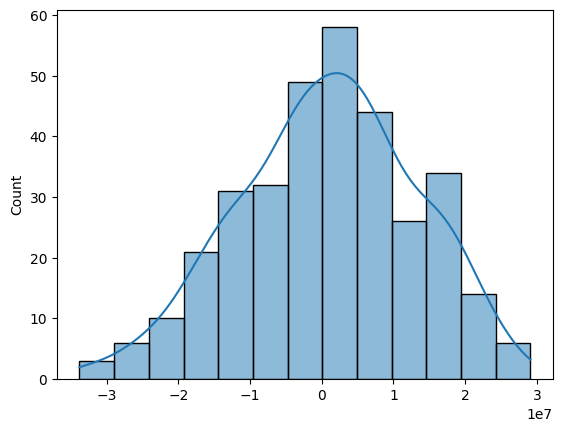

In [157]:
sns.histplot(differences, kde=True)
#plt.savefig('Images/histo.png')

plt.show()

It is important to notice that the positive side of the previous Histogram does not make sense on the first sight. It is showing cases
of rejected loans where the amount the bank could have lent was bigger than what the client actually asked for. We will do some diagrams
to see if we can justify this behaviour

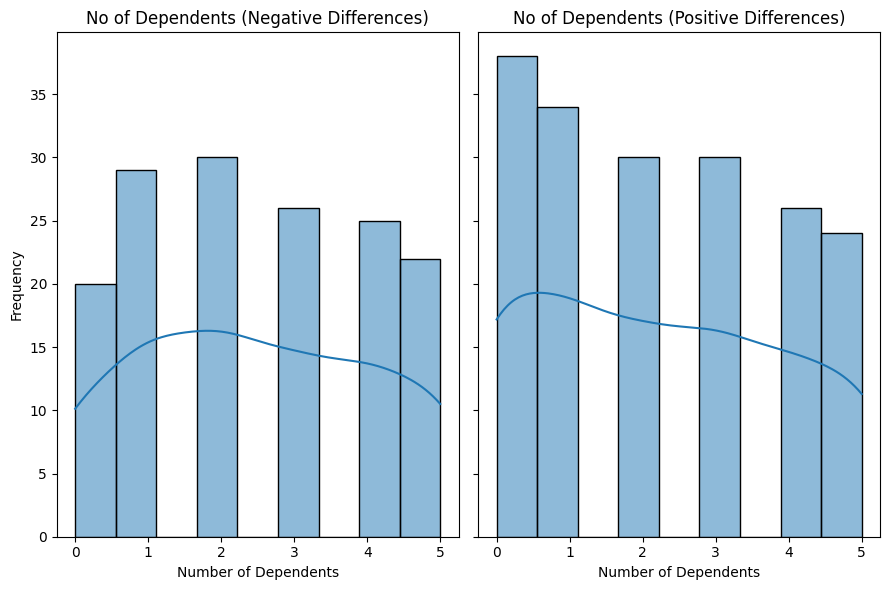

In [158]:
rejected_data['difference'] = differences

positive_diff = rejected_data[rejected_data['difference'] > 0]
negative_diff = rejected_data[rejected_data['difference'] < 0]

fig, axs = plt.subplots(1, 2, figsize=(9, 6), sharey=True)
sns.histplot(negative_diff['no_of_dependents'], kde=True, ax=axs[0])
axs[0].set_title('No of Dependents (Negative Differences)')
axs[0].set_xlabel('Number of Dependents')
axs[0].set_ylabel('Frequency')

sns.histplot(positive_diff['no_of_dependents'], kde=True, ax=axs[1])
axs[1].set_title('No of Dependents (Positive Differences)')
axs[1].set_xlabel('Number of Dependents')
plt.tight_layout()
#plt.savefig('Images/no_dependents.png')

plt.show()

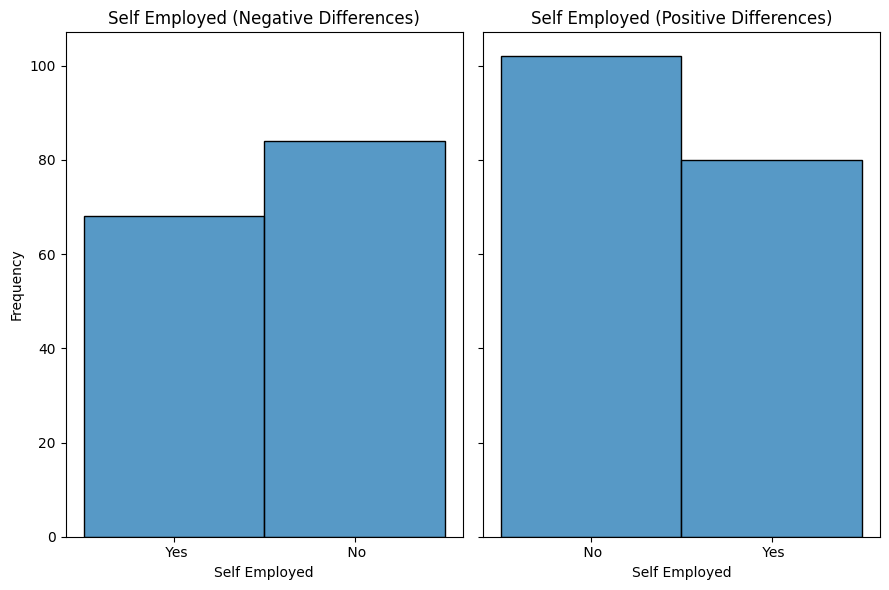

In [159]:
positive_diff = rejected_data[rejected_data['difference'] > 0]
negative_diff = rejected_data[rejected_data['difference'] < 0]

fig, axs = plt.subplots(1, 2, figsize=(9, 6), sharey=True)
sns.histplot(negative_diff['self_employed'], ax=axs[0])
axs[0].set_title('Self Employed (Negative Differences)')
axs[0].set_xlabel('Self Employed')
axs[0].set_ylabel('Frequency')

sns.histplot(positive_diff['self_employed'], ax=axs[1])
axs[1].set_title('Self Employed (Positive Differences)')
axs[1].set_xlabel('Self Employed')
plt.tight_layout()
#plt.savefig('Images/self_employed.png')

plt.show()

Looking at the previous plots, it makes sense that when the differences are positive, the client had more number of dependents. Having
a high number of dependents involves a higher risk for the bank. Moreover, the Unemployed: Employed ratio is higher when the differences
are positive, which also makes sense because lending money to unemployed people also involves more risk. 
Now we will see what happens to the assets

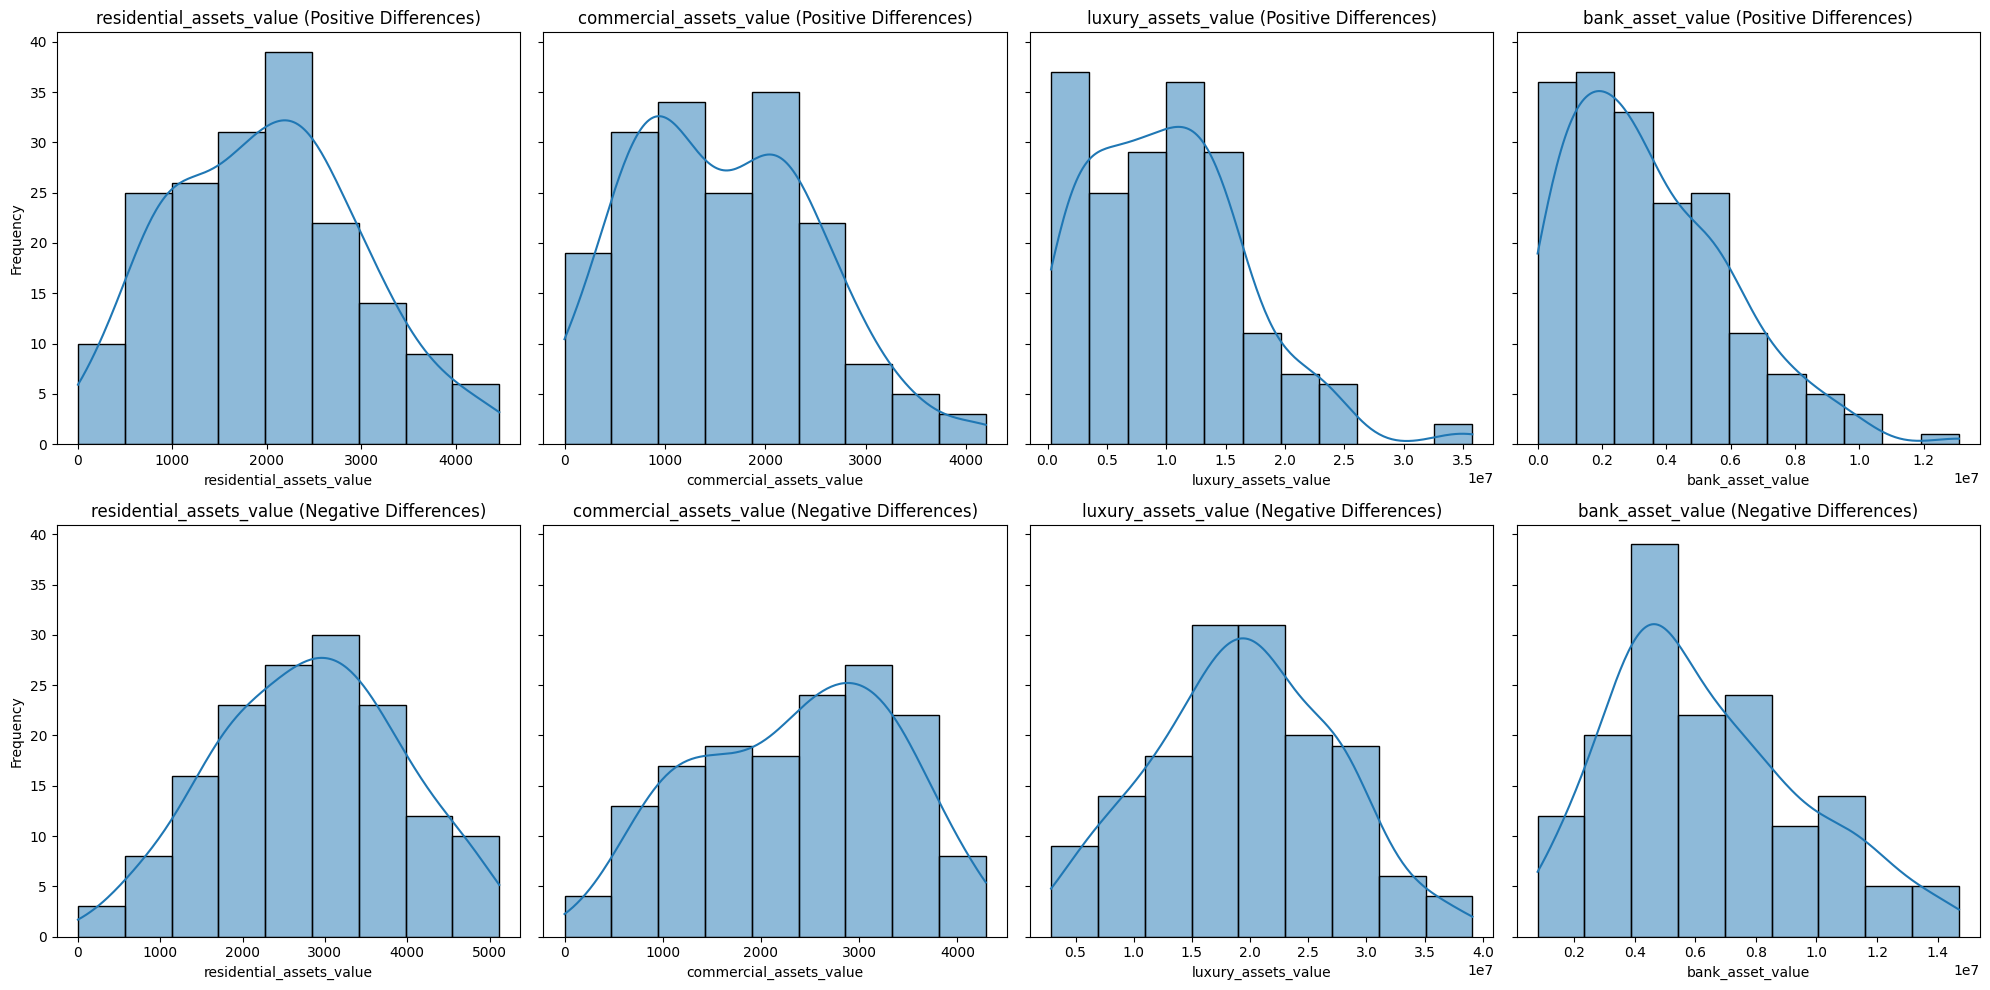

In [160]:
positive_diff = rejected_data[rejected_data['difference'] > 0]
negative_diff = rejected_data[rejected_data['difference'] < 0]

asset_columns = [
    'residential_assets_value', 
    'commercial_assets_value', 
    'luxury_assets_value', 
    'bank_asset_value'
]

fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey='row')

for i, col in enumerate(asset_columns):
    sns.histplot(positive_diff[col], kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'{col} (Positive Differences)')
    axs[0, i].set_xlabel(col)
    axs[0, i].set_ylabel('Frequency')
    
    sns.histplot(negative_diff[col], kde=True, ax=axs[1, i])
    axs[1, i].set_title(f'{col} (Negative Differences)')
    axs[1, i].set_xlabel(col)
    axs[1, i].set_ylabel('Frequency')
plt.tight_layout()
#plt.savefig('Images/assets.png')

plt.show()

Well, this graphs explain the behaviour even better, because normally banks do not like to lend money to people that have a lot of money
worth of assets and rely basically on those. In case the client does not finish the loan payment, the bank will be forced to take some of his assets and the 
problem with that is that those are not cash, so I understand if the bank does not want to lend money to some of these people.
The graphs at the bottom have higher values in general but smaller frequencies, meaning that in the positive side of the first histogram, a lot of people have assets. However, I understand that the graphs do not explain it completely

Loan Term

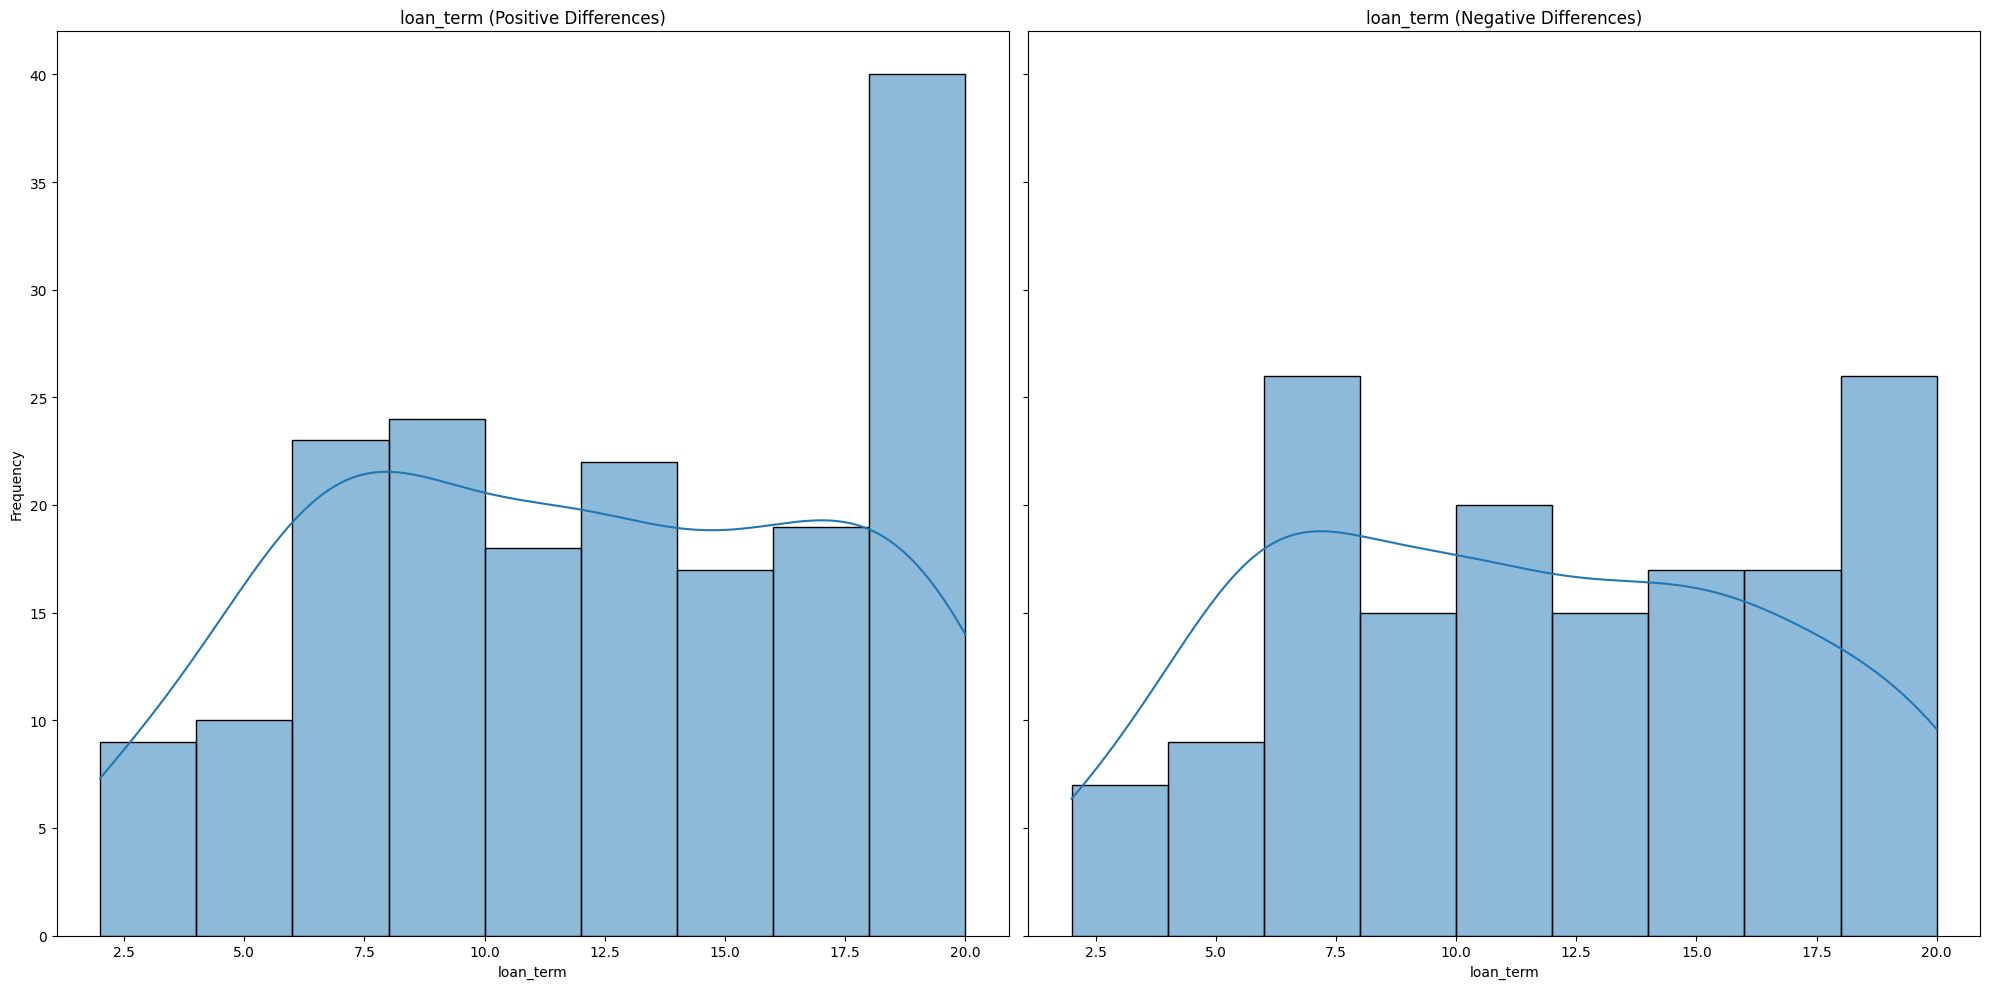

In [161]:
positive_diff = rejected_data[rejected_data['difference'] > 0]
negative_diff = rejected_data[rejected_data['difference'] < 0]

asset_columns = [
    'loan_term'   
]

fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

for i, col in enumerate(asset_columns):
    sns.histplot(positive_diff[col], kde=True, ax=axs[0])
    axs[0].set_title(f'{col} (Positive Differences)')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Frequency')
    
    sns.histplot(negative_diff[col], kde=True, ax=axs[1])
    axs[1].set_title(f'{col} (Negative Differences)')
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Frequency')

plt.tight_layout()
#plt.savefig('Images/loan_term.png')

plt.show()

Cibil Score

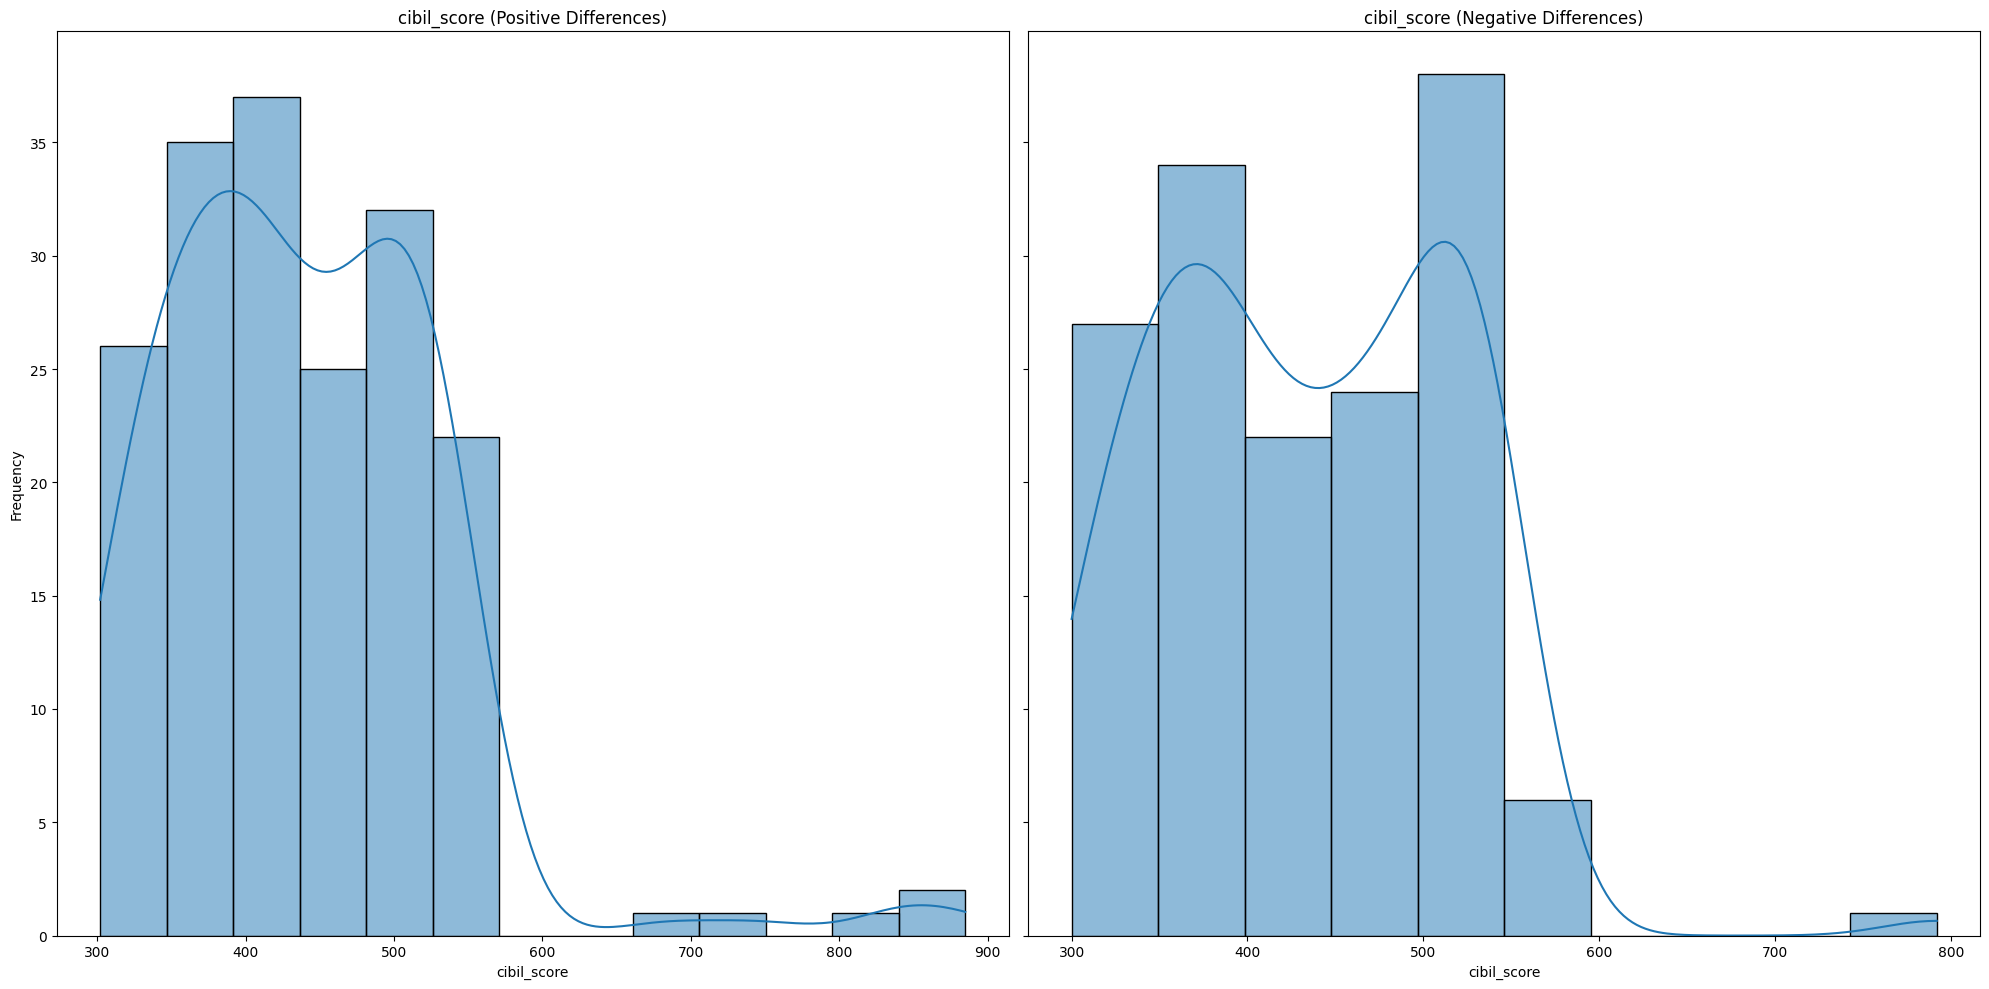

In [162]:
positive_diff = rejected_data[rejected_data['difference'] > 0]
negative_diff = rejected_data[rejected_data['difference'] < 0]

asset_columns = [
    'cibil_score'   
]

fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

for i, col in enumerate(asset_columns):
    sns.histplot(positive_diff[col], kde=True, ax=axs[0])
    axs[0].set_title(f'{col} (Positive Differences)')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Frequency')
    
    sns.histplot(negative_diff[col], kde=True, ax=axs[1])
    axs[1].set_title(f'{col} (Negative Differences)')
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Frequency')

plt.tight_layout()
#plt.savefig('Images/cibil_score.png')

plt.show()

Income

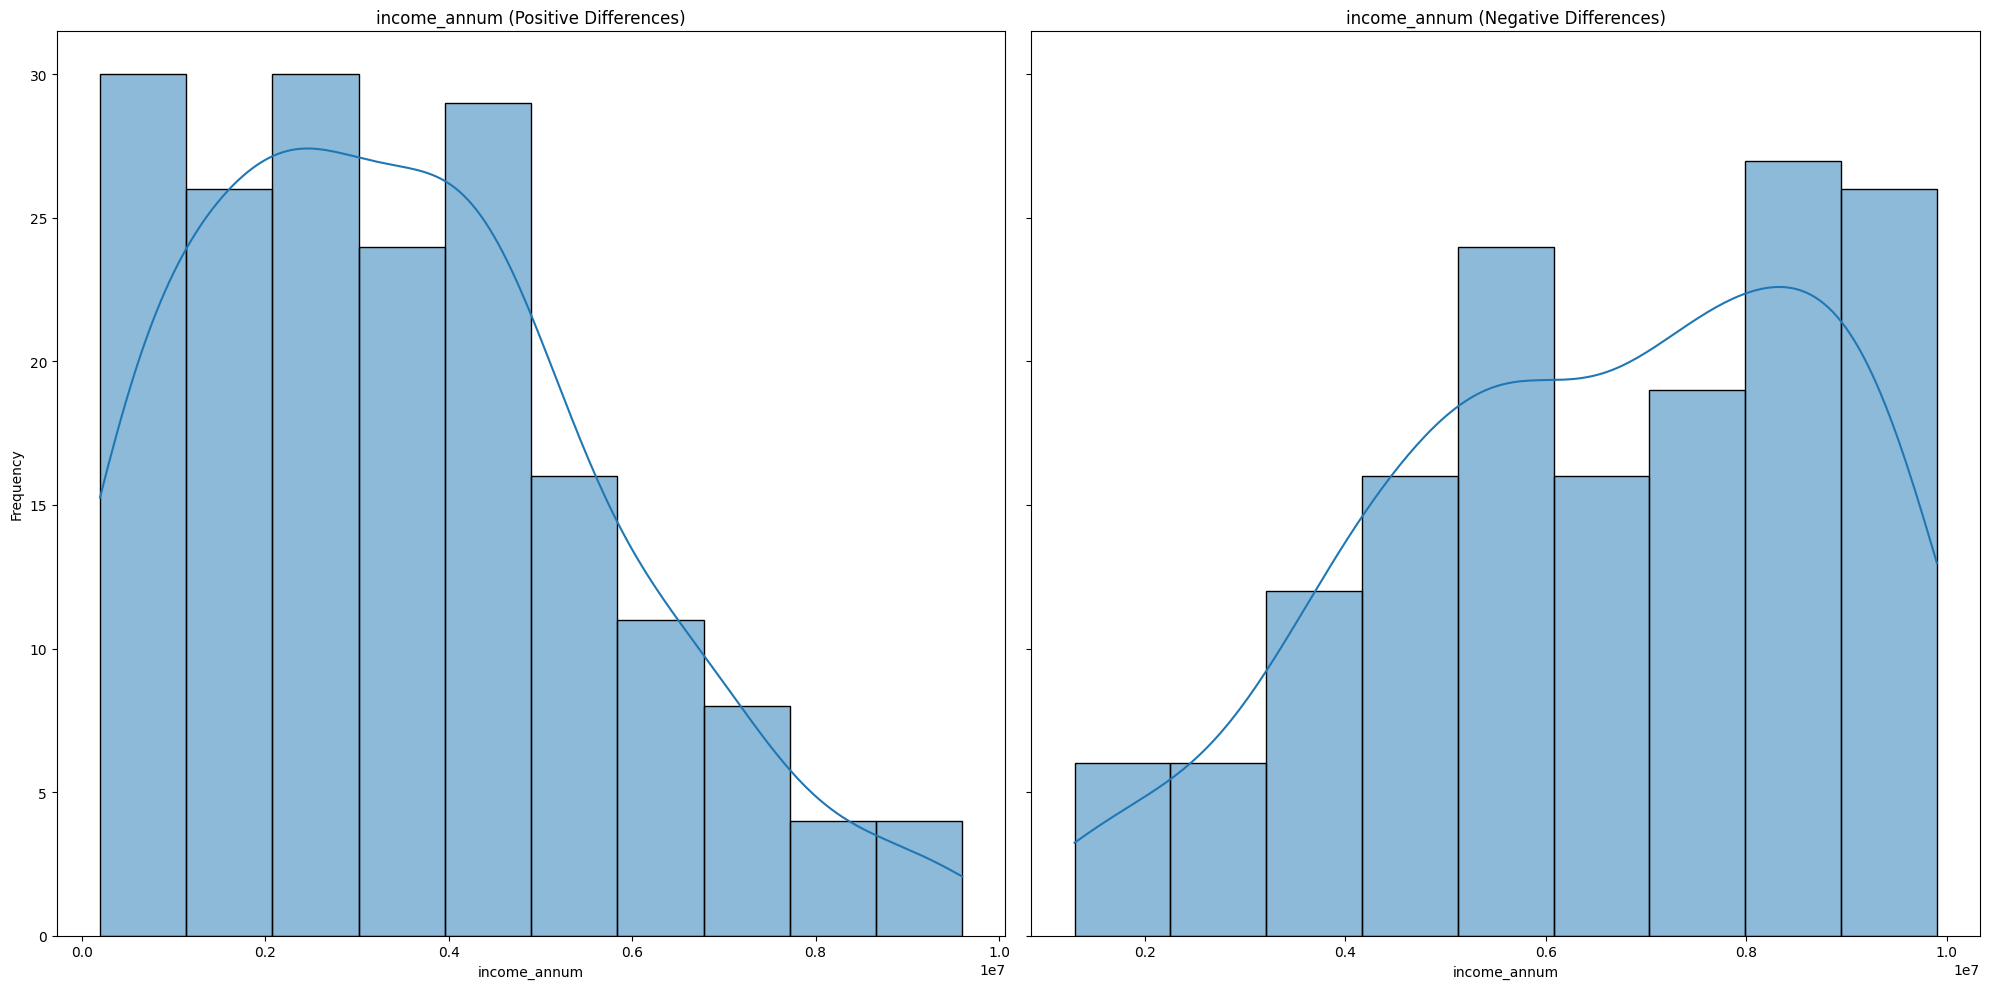

In [163]:
positive_diff = rejected_data[rejected_data['difference'] > 0]
negative_diff = rejected_data[rejected_data['difference'] < 0]

asset_columns = [
    'income_annum'   
]

fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

for i, col in enumerate(asset_columns):
    sns.histplot(positive_diff[col], kde=True, ax=axs[0])
    axs[0].set_title(f'{col} (Positive Differences)')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Frequency')
    
    sns.histplot(negative_diff[col], kde=True, ax=axs[1])
    axs[1].set_title(f'{col} (Negative Differences)')
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Frequency')

plt.tight_layout()
#plt.savefig('Images/income.png')

plt.show()

Let's proceed to do some quick calculations of the money the bank could have earned if it accepted loans that were rejected by a little bit
(10%). Obviously there are some risks of doing this because there is a reason why those loans were rejected, but I believe it gives some
interesting insights the bank could find useful

Maybe this one is the best one to explain the behaviour. The positive side has lower incomes, which is the most important variable of the Feature 
Importance (and it also makes sense that the Income is really important for the loan approval)

We will use a interest rate of 3.3% (the actual value for Spain)

In [164]:
max_acceptable_loan = rejected_data['loan_amount'] * 0.9

possible_loans = np.minimum(y_pred, max_acceptable_loan)
rejected_data['possible_loan'] = possible_loans

In [165]:
interest_rate = 0.033
loan_term_months = rejected_data['loan_term']

interest_earned = possible_loans * interest_rate * (loan_term_months / 12)
total_possible_loan = possible_loans.sum()
total_interest_earned = interest_earned.sum()

print(f'Total possible loan amount: ${total_possible_loan:.2f}')
print(f'The money the bank could have earned by applying this models: ${total_interest_earned:.2f}')

Total possible loan amount: $3003419029.84
The money the bank could have earned by applying this models: $95671513.23


In [166]:
#data=pd.read_csv('Data/loan_approval_dataset.csv')
average_loan_amount=data['loan_amount'].mean()
average_loan_amount

15133450.456781447

Besides, clients would be more happy with the bank, and could potentially be more profitable

#### Classification Models:

### 4) Logistic Regression

In [167]:
data.drop(columns=["residential_assets_value"],inplace=True)

In [168]:
le = LabelEncoder()

data["education"] = le.fit_transform(data["education"])
data["self_employed"] = le.fit_transform(data["self_employed"])
data["loan_status"] = le.fit_transform(data["loan_status"])

In [169]:
numericals=data.select_dtypes(include=np.number)

In [170]:
y=data["loan_status"]
x=data.drop(["loan_status"],axis=1)

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

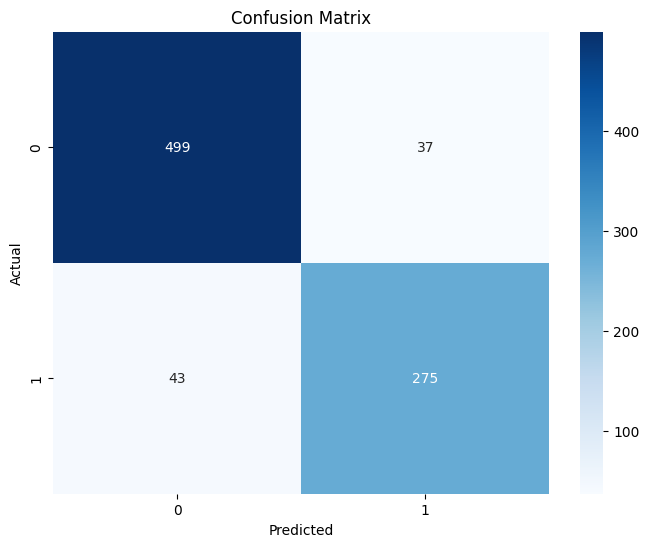

In [172]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(x_train_scaled, y_train)
y_pred = logistic_reg.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [173]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print("Classification Report:\n", classification_rep)

Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



### Feature Importance for Logistic Regression

The huge negative value in Cibil Score is enough for me to discard this model, unless the others are worse. We will see

### 5) KNN

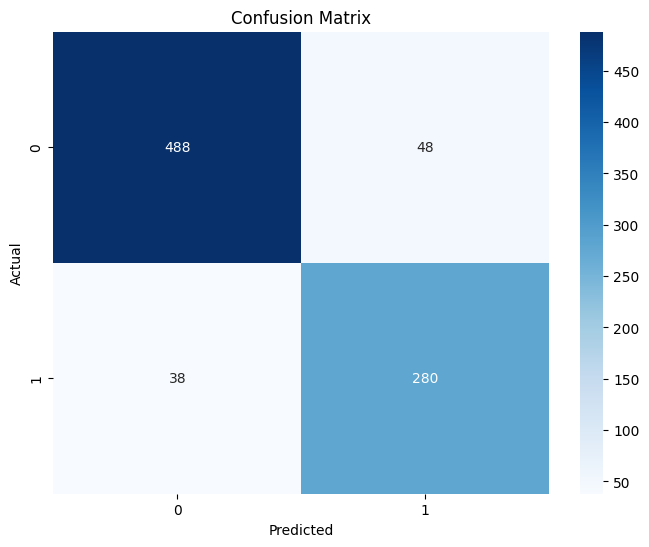

In [174]:
le = LabelEncoder()
data["education"] = le.fit_transform(data["education"])
data["self_employed"] = le.fit_transform(data["self_employed"])
data["loan_status"] = le.fit_transform(data["loan_status"])

numericals = data.select_dtypes(include=np.number)
y = data["loan_status"]
x = data.drop(["loan_status"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

y_pred = knn.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [175]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print("Classification Report:\n", classification_rep)

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       536
           1       0.85      0.88      0.87       318

    accuracy                           0.90       854
   macro avg       0.89      0.90      0.89       854
weighted avg       0.90      0.90      0.90       854



### 6) Random Forest

In [176]:
y = data['loan_status']
X = data.drop(['loan_status'], axis=1)

le = LabelEncoder()
X['education'] = le.fit_transform(X['education'].astype(str))
X['self_employed'] = le.fit_transform(X['self_employed'].astype(str))

X_cat = X[['education', 'self_employed']]
X_num = X.drop(['education', 'self_employed'], axis=1)

X_processed = pd.concat([X_num, X_cat], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}!')

Accuracy: 0.98!


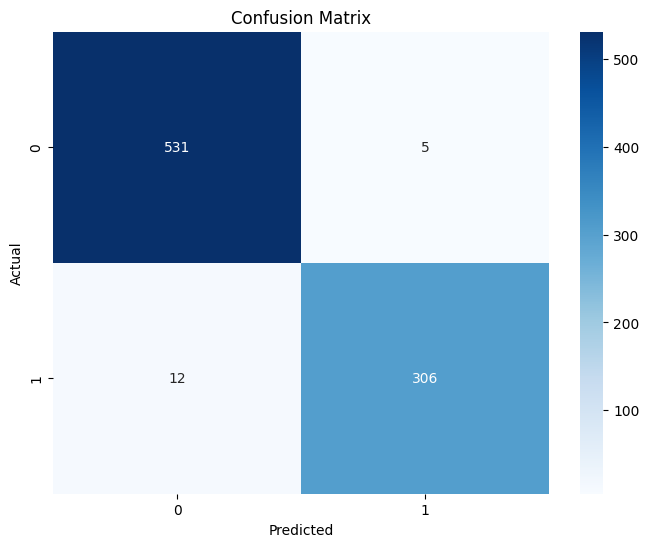

In [177]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [178]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print("Classification Report:\n", classification_rep)

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



### Feature Importance of the best model so far: Random Forest

In [179]:
feature_importances = clf.feature_importances_

feature_names = X.columns
importance_list = list(zip(feature_names, feature_importances))
importance_list_sorted = sorted(importance_list, key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in importance_list_sorted:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
loan_amount: 0.8218
income_annum: 0.0615
self_employed: 0.0333
education: 0.0187
cibil_score: 0.0182
loan_term: 0.0164
commercial_assets_value: 0.0162
no_of_dependents: 0.0085
bank_asset_value: 0.0029
luxury_assets_value: 0.0026


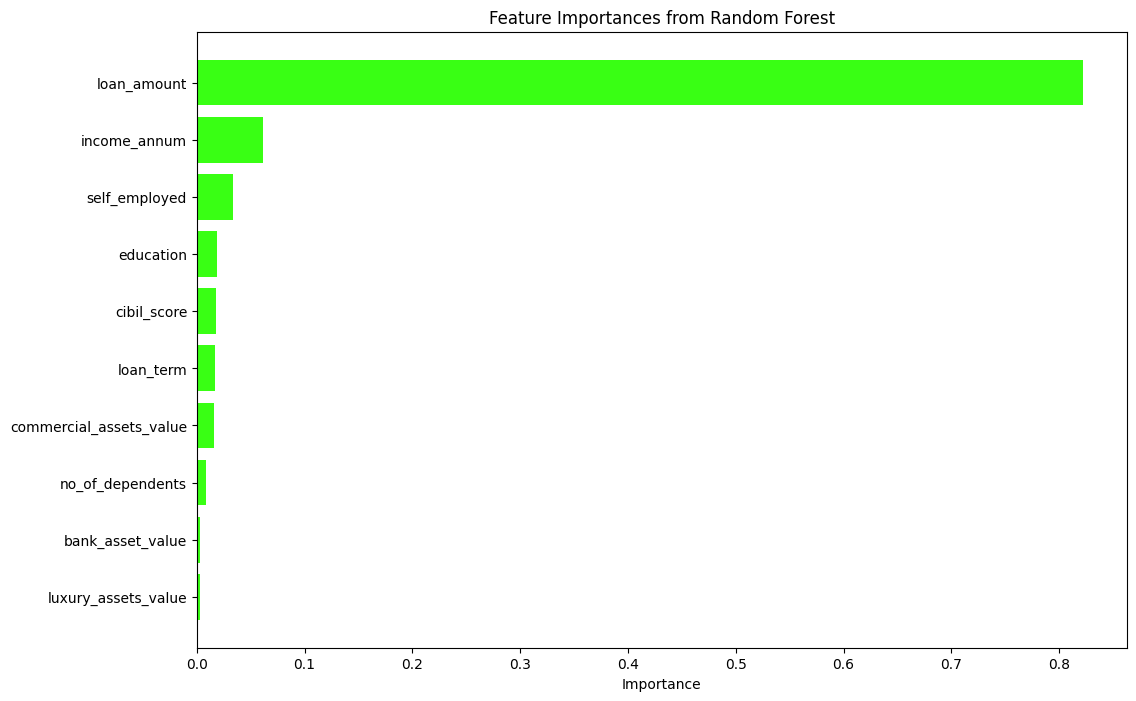

In [180]:
feature_importances = {
    'Feature': [
        'loan_amount', 'income_annum', 'self_employed', 'education',
        'cibil_score', 'loan_term', 'commercial_assets_value',
        'no_of_dependents', 'bank_asset_value', 'luxury_assets_value'
    ],
    'Importance': [
        0.8218, 0.0615, 0.0333, 0.0187, 0.0182, 0.0164, 0.0162, 0.0085, 0.0029, 0.0026
    ]
}

importance_df = pd.DataFrame(feature_importances)

importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#39FF14')  
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  
plt.show()

### Summary of Model Performances

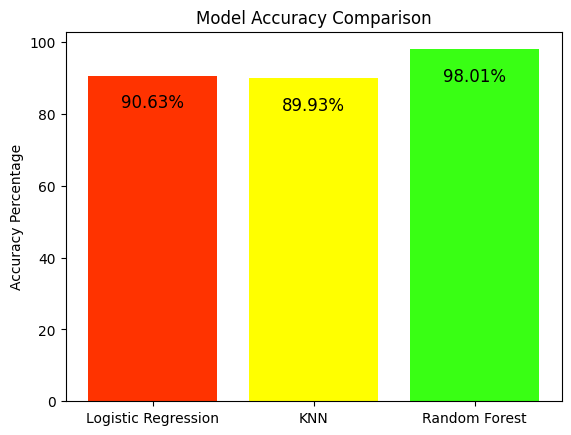

In [181]:
LogR = accuracy_score(y_test, logistic_reg.predict(x_test_scaled)) * 100
KNN = accuracy_score(y_test, knn.predict(x_test_scaled)) * 100
RF = accuracy_score(y_test, clf.predict(X_test)) * 100

Model = ['Logistic Regression', 'KNN', 'Random Forest']
Score = [LogR, KNN, RF]

colors = ['#FF3300', 'yellow', '#39FF14']  

barplot = plt.bar(x=Model, height=Score, color=colors, edgecolor='none')  

for i, v in enumerate(Score):
    plt.text(i, v - 5, f"{v:.2f}%", ha='center', va='top', color='black', fontsize=12)

plt.ylabel('Accuracy Percentage')
plt.title('Model Accuracy Comparison')
#plt.savefig('Images/model_accuracies.png')

plt.show()

### Cross Validation of the 3 Classification Models

In [182]:
#Logistic Regression
logistic_reg = LogisticRegression(random_state=42)
logistic_reg_cv_scores = cross_val_score(logistic_reg, x_train_scaled, y_train, cv=5, scoring='accuracy')

#KNN
knn = KNeighborsClassifier()
knn_cv_scores = cross_val_score(knn, x_train_scaled, y_train, cv=5, scoring='accuracy')

#Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Logistic Regression Cross-Validation Scores: {logistic_reg_cv_scores}')
print(f'Logistic Regression Mean Cross-Validation Accuracy: {logistic_reg_cv_scores.mean():.2f}')

print(f'KNN Cross-Validation Scores: {knn_cv_scores}')
print(f'KNN Mean Cross-Validation Accuracy: {knn_cv_scores.mean():.2f}')

print(f'Random Forest Cross-Validation Scores: {rf_cv_scores}')
print(f'Random Forest Mean Cross-Validation Accuracy: {rf_cv_scores.mean():.2f}')

Logistic Regression Cross-Validation Scores: [0.90629575 0.91215227 0.9341142  0.9136164  0.93118594]
Logistic Regression Mean Cross-Validation Accuracy: 0.92
KNN Cross-Validation Scores: [0.89165447 0.90922401 0.90922401 0.91068814 0.9033675 ]
KNN Mean Cross-Validation Accuracy: 0.90
Random Forest Cross-Validation Scores: [0.98096633 0.97510981 0.98243045 0.98389458 0.9795022 ]
Random Forest Mean Cross-Validation Accuracy: 0.98


The cross validation scores are great. They are quite similar with the accuracy scores of each model. Values are high meaning that the model
generalizes well to new data

### Feature importances of Log R and Random Forest

<Figure size 1400x1000 with 0 Axes>

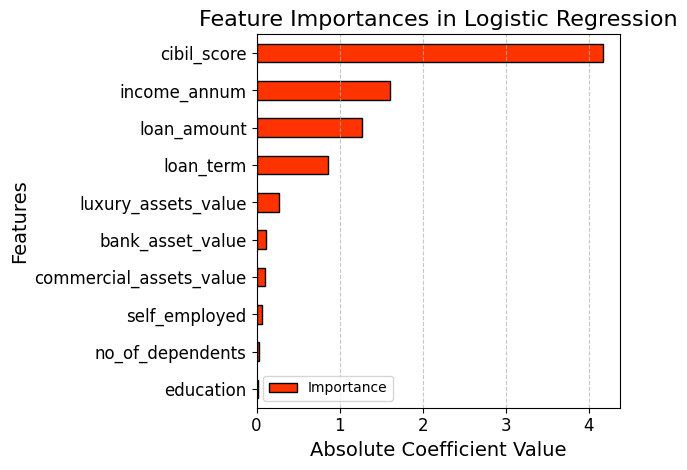

In [183]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(x_train_scaled, y_train)

y_pred = logistic_reg.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

if hasattr(logistic_reg, 'coef_'):
    feature_names_lr = x_train.columns
    coefficients = logistic_reg.coef_[0]
    importances_lr = pd.DataFrame({'Features': feature_names_lr, 'Importance': np.round(np.abs(coefficients), 3)})
    importances_lr = importances_lr.sort_values('Importance', ascending=True).set_index('Features')  

    plt.figure(figsize=(14, 10))
    importances_lr.plot.barh(color='#FF3300', edgecolor='black')
    plt.xlabel('Absolute Coefficient Value', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.title('Feature Importances in Logistic Regression', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.savefig('Images/logistic_regression_feature_importances.png', bbox_inches='tight')
    

    plt.show()
else:
    print("The model does not have the attribute 'coef_'.")

<Figure size 1400x1000 with 0 Axes>

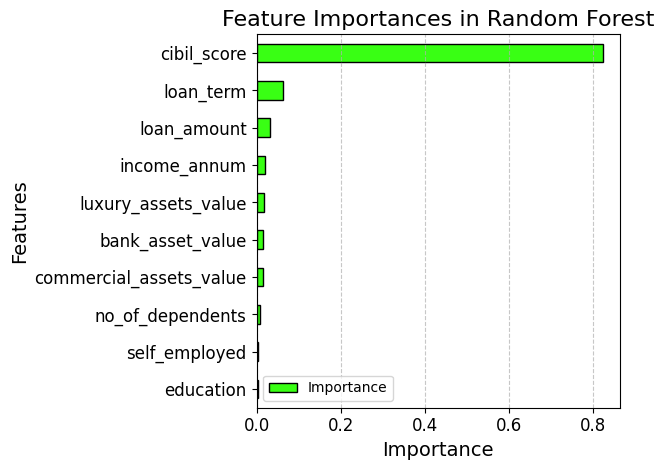

In [184]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)  

try:
    feature_importances = clf.feature_importances_
except NotFittedError as e:
    print("Model is not fitted yet. Please fit the model before accessing feature importances.")
    raise e

importances_rf = pd.DataFrame({'Features': X_train.columns, 'Importance': np.round(feature_importances, 3)})
importances_rf = importances_rf.sort_values('Importance', ascending=True).set_index('Features')  

plt.figure(figsize=(14, 10))
importances_rf.plot.barh(color='#39FF14', edgecolor='black')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances in Random Forest', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('Images/randomm_forest_feature_importances.png', bbox_inches='tight')

plt.show()

The Logistic Regression feature importance makes more sense, so that one will be my final model, eventhough is has less accuracy, it still has a high value (~91%)